# Classification of Hotel Reviews based on the review text (Excellent,Good or Bad)

## Understanding the Data and Preprocessing the Data

### Importing required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings

In [2]:
import keras
import nltk
import re
import codecs

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\prash\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Reading and Exploring the Data

In [4]:
os.chdir("E:\Insofe\PH.D\PHD_ML")

In [5]:
hotels = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv", parse_dates=[3])

#### While reading the date I have provided parse_dates for the conversion of Date column to datetime format

In [6]:
hotels.head()

Hotelid      userid                                         reviewtext  \
0  hotel_101  hotel_2225  Just An Average stay This was just an average ...   
1  hotel_101  hotel_5079  go elsewhere The place is hugely overpriced an...   
2  hotel_101  hotel_8440  I Won't Go Back I stayed at the hotel 11/14/08...   
3  hotel_101  hotel_4592  Good weekend stay My wife and I stay here quit...   
4  hotel_101  hotel_5901  Great airport stay Lovely indoor pool area, lo...   

        Date  NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0 2008-12-13            0                     0             4             4   
1 2008-12-02            0                     0             2             4   
2 2008-11-18            0                     0             2             4   
3 2008-10-19            0                     0             5             5   
4 2008-10-13            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservice_rating  AverageOverallRatingOfHotel AveragePricing  
0                       3                          3.5           $245  
1                       2                          3.5           $245  
2                       1                          3.5           $245  
3                       3                          3.5           $245  
4                       6                          3.5           $245

In [7]:
hotels.tail()

Hotelid       userid  \
7499  hotel_200   hotel_4764   
7500  hotel_200   hotel_6698   
7501  hotel_200   hotel_6390   
7502  hotel_200   hotel_7902   
7503  hotel_200  hotel_10561   

                                             reviewtext       Date  \
7499  Un hotel encantador, muy recomendable   showRe... 2008-08-18   
7500       Buon albergo   showReview(15155815, 'full'); 2008-04-20   
7501  Un hotel eccezionale   showReview(14980612, 'f... 2008-04-12   
7502             Ottimo   showReview(14599783, 'full'); 2008-03-28   
7503  Un relax en el ritmo trepidante de New York   ... 2008-03-22   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel AveragePricing  
7499                       5                          4.5           $370  
7500                       4                          4.5           $370  
7501                       6                          4.5           $370  
7502                       5                          4.5           $370  
7503                       6                          4.5           $370

In [8]:
print ('The train data has {0} rows and {1} columns'.format(hotels.shape[0],hotels.shape[1]))

The train data has 7504 rows and 15 columns


#### Attributes given are Hotels ID's, ReviewID, UserID, Date, reviewtext and the corresponding SentimnetAttributes given are Hotels ID's, ReviewID, UserID, reviewtext, Date, NoOfReaders, HelpfulToNoOfreaders, Value_rating, Rooms_rating , Location_rating, Cleanliness_rating, Service_rating, Businessservice_rating, AverageOverallRatingOfHotel and AveragePricing

In [9]:
hotels.describe(include='all' )

Hotelid      userid  \
count        7504        7504   
unique         75        7313   
top     hotel_188  hotel_4370   
freq          703           4   
first         NaN         NaN   
last          NaN         NaN   
mean          NaN         NaN   
std           NaN         NaN   
min           NaN         NaN   
25%           NaN         NaN   
50%           NaN         NaN   
75%           NaN         NaN   
max           NaN         NaN   

                                               reviewtext  \
count                                                7504   
unique                                               7504   
top     Great Find in San Fran --- with an even better...   
freq                                                    1   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                       Date  NoOfReaders  HelpfulToNoOfreaders  Value_rating  \
count                  7504  7504.000000           7504.000000   7504.000000   
unique                 1696          NaN                   NaN           NaN   
top     2008-03-28 00:00:00          NaN                   NaN           NaN   
freq                     19          NaN                   NaN           NaN   
first   2002-10-16 00:00:00          NaN                   NaN           NaN   
last    2009-01-08 00:00:00          NaN                   NaN           NaN   
mean                    NaN     3.394856              2.701493      3.986141   
std                     NaN     4.540590              3.579700      1.850848   
min                     NaN     0.000000              0.000000      1.000000   
25%                     NaN     1.000000              0.000000      2.000000   
50%                     NaN     2.000000              2.000000      5.000000   
75%                     NaN     5.000000              4.000000      6.000000   
max                     NaN    64.000000             55.000000      6.000000   

        Rooms_rating  Location_rating  Cleanliness_rating  Checkin_rating  \
count    7504.000000      7504.000000         7504.000000     7504.000000   
unique           NaN              NaN                 NaN             NaN   
top              NaN              NaN                 NaN             NaN   
freq             NaN              NaN                 NaN             NaN   
first            NaN              NaN                 NaN             NaN   
last             NaN              NaN                 NaN             NaN   
mean        4.006130         3.787180            4.219483        3.602479   
std         1.809968         2.160467            1.868013        2.109845   
min         1.000000         1.000000            1.000000        1.000000   
25%         3.000000         1.000000            3.000000        1.000000   
50%         5.000000         5.000000            5.000000        4.000000   
75%         5.000000         6.000000            6.000000        6.000000   
max         6.000000         6.000000            6.000000        6.000000   

        Service_rating  Businessservice_rating  AverageOverallRatingOfHotel  \
count      7504.000000             7504.000000                  7504.000000   
unique             NaN                     NaN                          NaN   
top                NaN                     NaN                          NaN   
freq               NaN                     NaN                          NaN   
first              NaN                     NaN                          NaN   
last              

#### Setting the MaxColmun width to 500 for the better reading of reviewtext

In [10]:
pd.set_option('max_colwidth', 500)

In [11]:
hotels.tail()

Hotelid       userid  \
7499  hotel_200   hotel_4764   
7500  hotel_200   hotel_6698   
7501  hotel_200   hotel_6390   
7502  hotel_200   hotel_7902   
7503  hotel_200  hotel_10561   

                                                                       reviewtext  \
7499        Un hotel encantador, muy recomendable   showReview(19062498, 'full');   
7500                                 Buon albergo   showReview(15155815, 'full');   
7501                         Un hotel eccezionale   showReview(14980612, 'full');   
7502                                       Ottimo   showReview(14599783, 'full');   
7503  Un relax en el ritmo trepidante de New York   showReview(14443615, 'full');   

           Date  NoOfReaders  HelpfulToNoOfreaders  Value_rating  \
7499 2008-08-18            0                     0             5   
7500 2008-04-20            0                     0             4   
7501 2008-04-12            0                     0             6   
7502 2008-03-28            0                     0             6   
7503 2008-03-22            0                     0             5   

      Rooms_rating  Location_rating  Cleanliness_rating  Checkin_rating  \
7499             6                6                   6               6   
7500             5                5                   4               5   
7501             6                6                   6               6   
7502             5                5                   6               5   
7503             5                5                   6               6   

      Service_rating  Businessservice_rating  AverageOverallRatingOfHotel  \
7499               6                       5                          4.5   
7500               5                       4                          4.5   
7501               6                       6                          4.5   
7502               5                       5                          4.5   
7503               6                       6                          4.5   

     AveragePricing  
7499           $370  
7500           $370  
7501           $370  
7502           $370  
7503           $370

In [12]:
# Removing $ Sign from Average pricing column
hotels['AveragePricing'] = hotels['AveragePricing'].str.replace('$', '').astype('int64')

In [13]:
dtype_df = hotels.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0  datetime64[ns]      1
1           int64     10
2         float64      1
3          object      3

#### There are 15 attributes.. 3 are object Type, 10 are int64 type, 1 is float 64 type and 1 is Date Type

### Checking for the missing values

In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [15]:
missing_values_table(hotels)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### There are no missing values in the given data set

### Checking the Unique value counts

In [16]:
unique_counts = pd.DataFrame.from_records([(col, hotels[col].nunique()) for col in hotels.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
6                  Value_rating           6
7                  Rooms_rating           6
8               Location_rating           6
9            Cleanliness_rating           6
10               Checkin_rating           6
11               Service_rating           6
12       Businessservice_rating           6
13  AverageOverallRatingOfHotel           6
5          HelpfulToNoOfreaders          36
4                   NoOfReaders          48
14               AveragePricing          66
0                       Hotelid          75
3                          Date        1696
1                        userid        7313
2                    reviewtext        7504

#### Data given is for reviews of 75 hotels, 7313 userid's means there are few users given ratings more than one time. ReviewID and ReviewText are unique. Reviews date spread across 1696 days and all the ratings for various services are between 1-6 scale

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.2.2
0.8.1


### Let us work with Date Column to see reviews trend over the time

#### Just extracting Date column for the analysis

In [18]:
dates = hotels['Date']

In [19]:
dates.head()

0   2008-12-13
1   2008-12-02
2   2008-11-18
3   2008-10-19
4   2008-10-13
Name: Date, dtype: datetime64[ns]

#### Feature Engineering the Date and getting new values like quarter, month, week, day from it

In [20]:
date_expanded = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
              "dayofmonth": dates.dt.day,
              "dayofyear": dates.dt.dayofyear,
              "week": dates.dt.week,
              "weekofyear": dates.dt.weekofyear,
              "dayofweek": dates.dt.dayofweek,
              "weekday": dates.dt.weekday,
              "quarter": dates.dt.quarter,
             })

In [21]:
date_expanded.head()

year  month  dayofmonth  dayofyear  week  weekofyear  dayofweek  weekday  \
0  2008     12          13        348    50          50          5        5   
1  2008     12           2        337    49          49          1        1   
2  2008     11          18        323    47          47          1        1   
3  2008     10          19        293    42          42          6        6   
4  2008     10          13        287    42          42          0        0   

   quarter  
0        4  
1        4  
2        4  
3        4  
4        4

In [22]:
date_expanded['quarter'] = date_expanded['quarter'].map({1: 'Quarter 1', 2: "Quarter 2", 3:'Quarter 3', 4: 'Quarter 4'})

In [23]:
date_expanded['month'] = date_expanded['month'].map({1: 'Jan', 2: "Feb", 3:'Mar', 4: 'Apr',5: 'May', 6: "Jun", 7:'Jul', 8: 'Aug',9: 'Sep', 10: "Oct", 11:'Nov', 12: 'Dec'})

In [24]:
date_expanded['dayofweek'] = date_expanded['dayofweek'].map({0: 'Monday', 1: "Tuesday", 2:'Wednesday', 4: 'Thursday',5: 'Friday', 6: "Saturday", 7:'Sunday'})

In [25]:
date_expanded.head()

year month  dayofmonth  dayofyear  week  weekofyear dayofweek  weekday  \
0  2008   Dec          13        348    50          50    Friday        5   
1  2008   Dec           2        337    49          49   Tuesday        1   
2  2008   Nov          18        323    47          47   Tuesday        1   
3  2008   Oct          19        293    42          42  Saturday        6   
4  2008   Oct          13        287    42          42    Monday        0   

     quarter  
0  Quarter 4  
1  Quarter 4  
2  Quarter 4  
3  Quarter 4  
4  Quarter 4

#### Let us look at the no of reviews given in each year

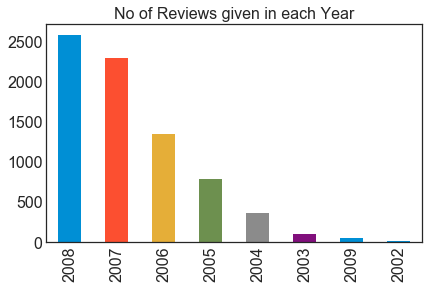

In [26]:
date_expanded['year'].value_counts().plot.bar(title="No of Reviews given in each Year")

In [27]:
date_expanded

year month  dayofmonth  dayofyear  week  weekofyear  dayofweek  weekday  \
0     2008   Dec          13        348    50          50     Friday        5   
1     2008   Dec           2        337    49          49    Tuesday        1   
2     2008   Nov          18        323    47          47    Tuesday        1   
3     2008   Oct          19        293    42          42   Saturday        6   
4     2008   Oct          13        287    42          42     Monday        0   
5     2008   Sep          24        268    39          39  Wednesday        2   
6     2008   Aug          30        243    35          35     Friday        5   
7     2008   Aug          19        232    34          34    Tuesday        1   
8     2008   Jul          29        211    31          31    Tuesday        1   
9     2008   Jun          12        164    24          24        NaN        3   
10    2008   Jun           6        158    23          23   Thursday        4   
11    2008   Apr          13        104    15          15   Saturday        6   
12    2008   Mar          27         87    13          13        NaN        3   
13    2008   Mar          14         74    11          11   Thursday        4   
14    2007   Nov          16        320    46          46   Thursday        4   
15    2007   Oct          30        303    44          44    Tuesday        1   
16    2007   Oct          12        285    41          41   Thursday        4   
17    2007   Aug          31        243    35          35   Thursday        4   
18    2007   Jul          18        199    29          29  Wednesday        2   
19    2007   Jul          13        194    28          28   Thursday        4   
20    2007   Jul           4        185    27          27  Wednesday        2   
21    2007   Jun          14        165    24          24        NaN        3   
22    2007   Jun          13        164    24          24  Wednesday        2   
23    2007   May          30        150    22          22  Wednesday        2   
24    2007   May          27        147    21          21   Saturday        6   
25    2007   Apr          28        118    17          17     Friday        5   
26    2007   Apr          20        110    16          16   Thursday        4   
27    2007   Mar          13         72    11          11    Tuesday        1   
28    2007   Mar           3         62     9           9     Friday        5   
29    2007   Jan          16         16     3           3    Tuesday        1   
...    ...   ...         ...        ...   ...         ...        ...      ...   
7474  2005   May          17        137    20          20    Tuesday        1   
7475  2005   Apr          26        116    17          17    Tuesday        1   
7476  2005   Apr          25        115    17          17     Monday        0   
7477  2005   Mar          18         77    11          11   Thursday        4   
7478  2005   Mar          17         76    11          11        NaN        3   
7479  2005   Mar          17         76    11          11        NaN        3   
7480  2005   Feb          25         56     8           8   Thursday        4   
7481  2005   Feb          24         55     8           8        NaN        3   
7482  2005   Feb          22         53     8           8    Tuesday        1   
7483  2005   Feb          18         49     7           7   Thursday        4   
7484  2005   Jan          18         18     3           3    Tuesday        1   
7485  2005   Jan           6          6     1           1        NaN        3   
7486  2004   Nov          11        316    46          46        NaN        3   
7487  2004   Oct          28        302    44          44        NaN        3   
7488  2004   Oct          13        287    42          42  Wednesday        2   
7489  2004   Sep          22        266    39          39  Wednesday        2   
7490  2004   Sep          21        265    39          39    Tuesday        1   
7491  2004   Jul          31        2

#### In the year 2007 there are more no of reviews given and 2004 is least. Reviews are in descending order from 2007 to 2004

### Let us look at the No of Reviews given each quarter for all the years

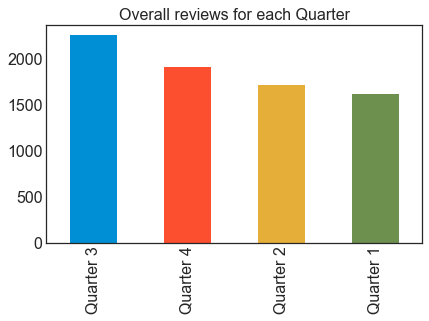

In [28]:
date_expanded['quarter'].value_counts().plot.bar(title= "Overall reviews for each Quarter")

#### Quarter 3 has more no of reviews means more visits to hotel, and Quarter 1 has less no of reviews

### A look at the no of reviews given for each month across all the years

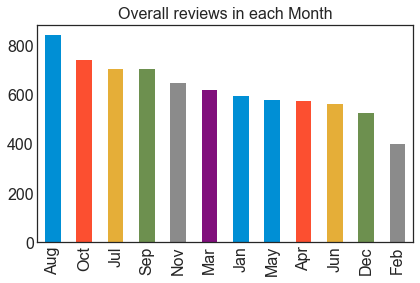

In [29]:
date_expanded['month'].value_counts().plot.bar(title= "Overall reviews in each Month")

#### August month has more no of reviews followed by October where as Feb and Jan months has the least no of reviews

### Let's check the review trend for weeks in all the years

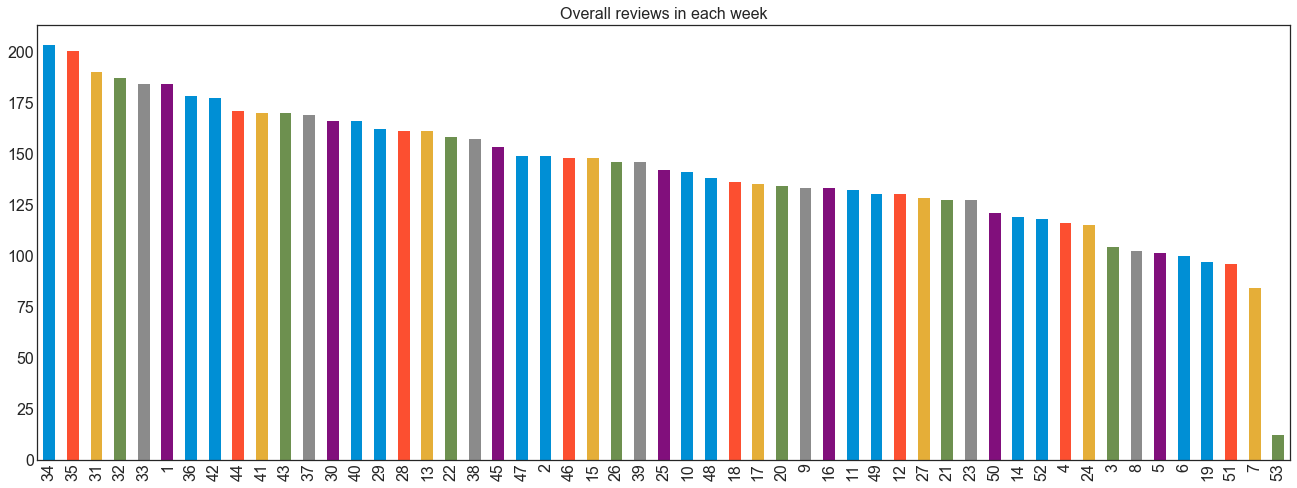

In [30]:
date_expanded['week'].value_counts().plot.bar(title= "Overall reviews in each week",figsize = (20,8))

#### Week 35,33,34 and31 in the calender year has more no of reviews, and those weeks belongs to August month in 2004,2005,2006 and in 2007.. So again we can confirm that more no of reviews in August month

In [31]:
date_expanded.head()

year month  dayofmonth  dayofyear  week  weekofyear dayofweek  weekday  \
0  2008   Dec          13        348    50          50    Friday        5   
1  2008   Dec           2        337    49          49   Tuesday        1   
2  2008   Nov          18        323    47          47   Tuesday        1   
3  2008   Oct          19        293    42          42  Saturday        6   
4  2008   Oct          13        287    42          42    Monday        0   

     quarter  
0  Quarter 4  
1  Quarter 4  
2  Quarter 4  
3  Quarter 4  
4  Quarter 4

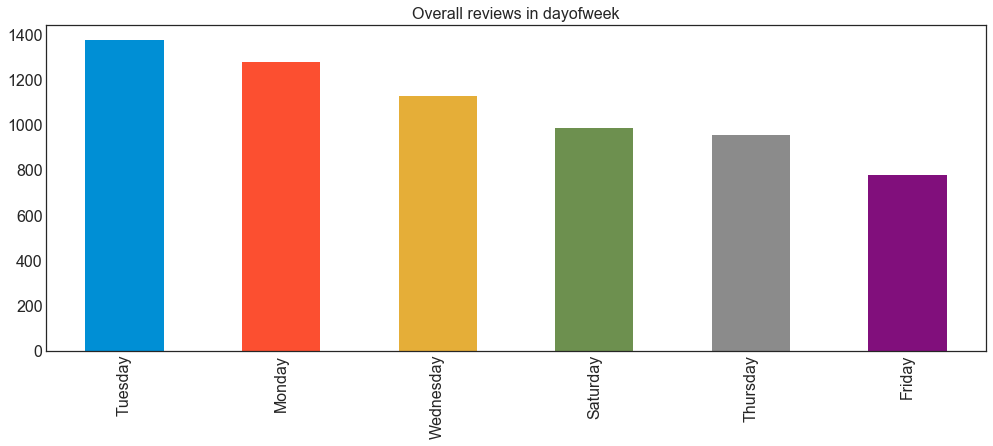

In [32]:
date_expanded['dayofweek'].value_counts().plot.bar(title= "Overall reviews in dayofweek", figsize = (15,6))

### Let us look at the Day wise reviews in a month for all the years

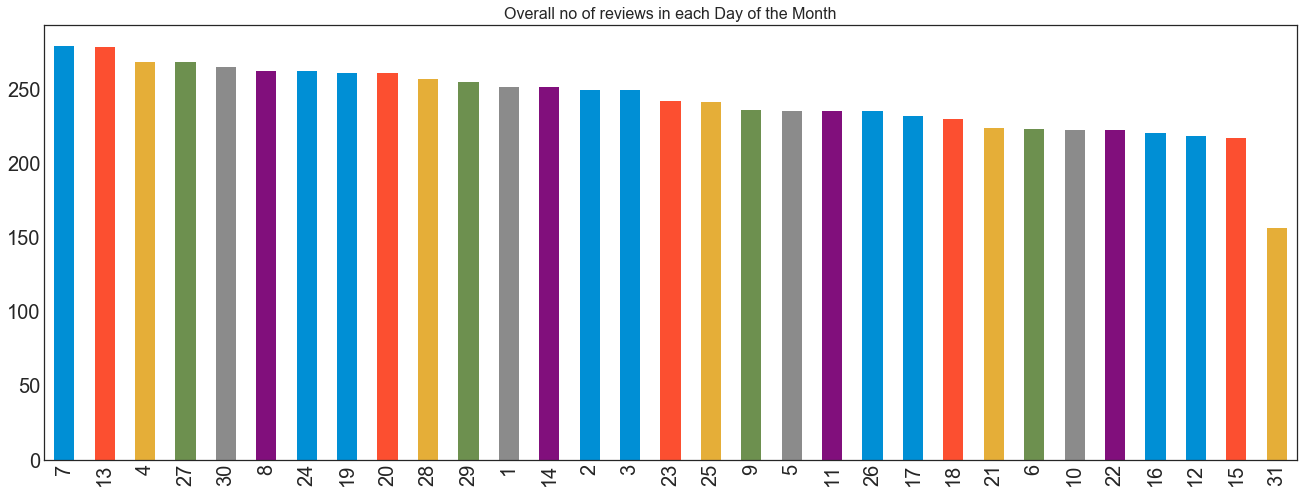

In [33]:
date_expanded['dayofmonth'].value_counts().plot.bar(title="Overall no of reviews in each Day of the Month", figsize = (20,8), fontsize = 20)

In [34]:
date_new = date_expanded['dayofyear'].value_counts().head(20)

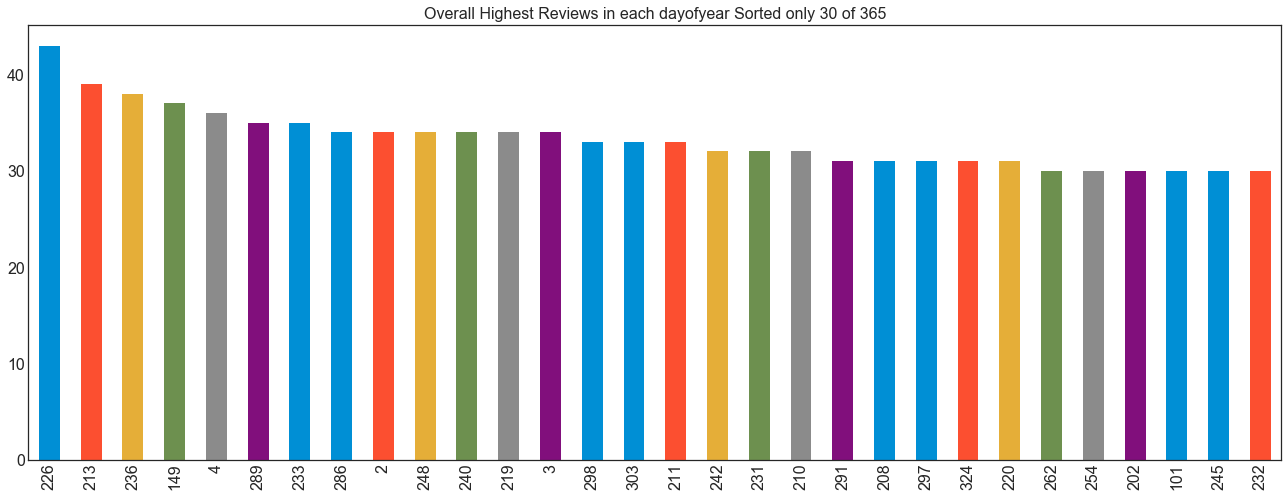

In [35]:
date_expanded['dayofyear'].value_counts().head(30).plot.bar(title= "Overall Highest Reviews in each dayofyear Sorted only 30 of 365",figsize = (20,8))

#### Again 236th day, 226th day are falls in August month, maximum reviews are 40

### Let us have a look at the review ditribution in each day of the year with least count

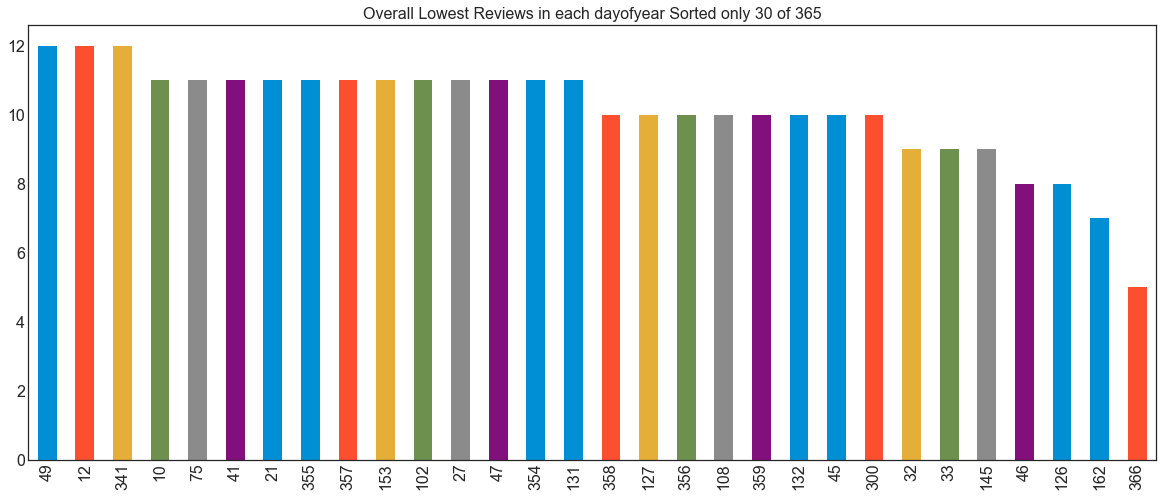

In [36]:
date_expanded['dayofyear'].value_counts().tail(30).plot.bar(title= "Overall Lowest Reviews in each dayofyear Sorted only 30 of 365",figsize = (18,8))

#### Its not suprise that Starting day of the year Jan 1st having very less no of reviews across all the years

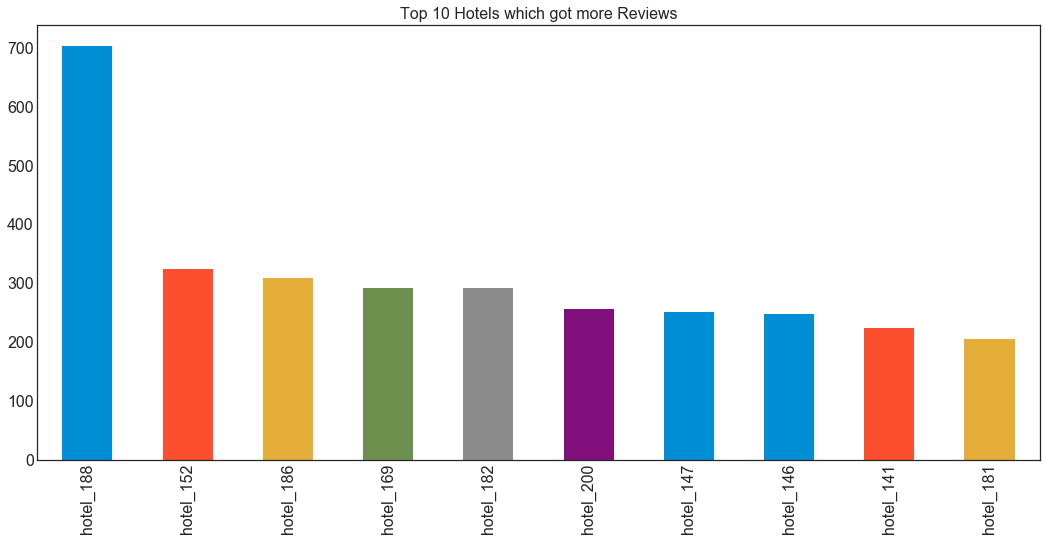

In [37]:
hotels['Hotelid'].value_counts().head(10).plot.bar(title= "Top 10 Hotels which got more Reviews",figsize = (16,8))

#### Hotel with HotelID 188 got more no of reviews above 500

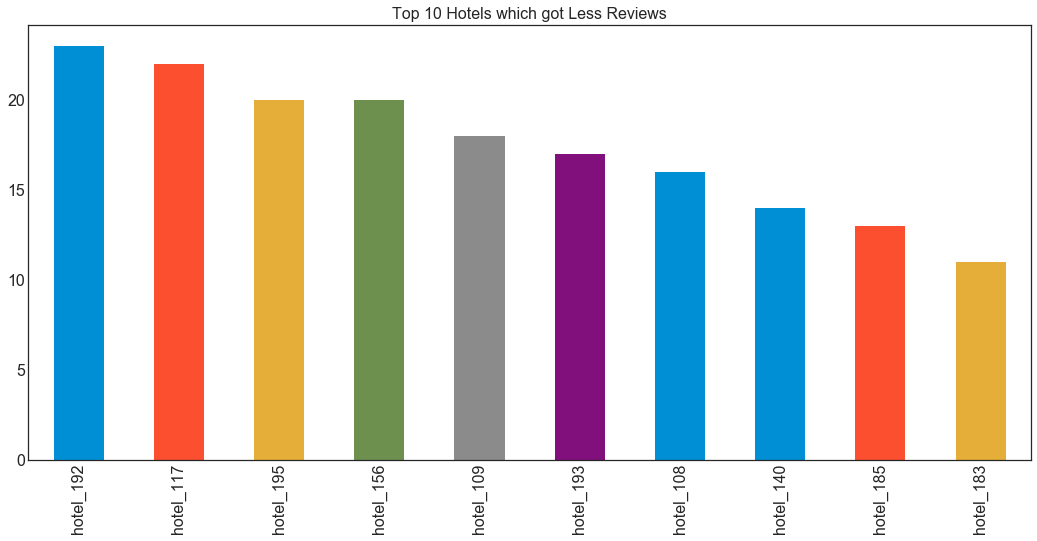

In [38]:
hotels['Hotelid'].value_counts().tail(10).plot.bar(title= "Top 10 Hotels which got Less Reviews",figsize = (16,8))

#### Hotel with HotelID 183 and 123 got less no of reviews , only 2

### Let us combine the Date_expanded with hotels data for further undersating

In [39]:
hotels = pd.concat([hotels, date_expanded], axis=1)

In [40]:
hotels.tail(1)

Hotelid       userid  \
7503  hotel_200  hotel_10561   

                                                                       reviewtext  \
7503  Un relax en el ritmo trepidante de New York   showReview(14443615, 'full');   

           Date  NoOfReaders  HelpfulToNoOfreaders  Value_rating  \
7503 2008-03-22            0                     0             5   

      Rooms_rating  Location_rating  Cleanliness_rating    ...      \
7503             5                5                   6    ...       

      AveragePricing  year  month  dayofmonth  dayofyear  week weekofyear  \
7503             370  2008    Mar          22         82    12         12   

      dayofweek  weekday    quarter  
7503     Friday        5  Quarter 1  

[1 rows x 24 columns]

# Year Wise Reviews vs Overall Avg rating


In [41]:
yearwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["year"])
yearwise_reviews

year                         2002  2003  2004  2005  2006  2007  2008  2009
AverageOverallRatingOfHotel                                                
2.0                             0     3     2    12    18    36    33     0
2.5                             0     2     6    10    32    40    52     0
3.0                             0     4    11    34    50    91   101     3
3.5                             1    40   146   343   621  1041  1184    20
4.0                             4    46   187   345   544   868   945    19
4.5                             0     3    10    36    78   212   260    11

#### Quarter Wise Reviews Vs Overall Avg rating

In [42]:
quarterwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["quarter"])
quarterwise_reviews

quarter                      Quarter 1  Quarter 2  Quarter 3  Quarter 4
AverageOverallRatingOfHotel                                            
2.0                                 27         18         32         27
2.5                                 35         26         34         47
3.0                                 73         81         78         62
3.5                                756        786       1039        815
4.0                                586        681        893        798
4.5                                139        124        179        168

#### Month Wise Reviews Vs Overall Avg rating

In [43]:
monthwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["month"])
monthwise_reviews

month                        Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
AverageOverallRatingOfHotel                                                     
2.0                           11   12    5    5    8   10    2   14    5   10   
2.5                            8   11   14    6   14   15    9   15    9   17   
3.0                           25   33   15   19   29   28   24   25   32   30   
3.5                          253  386  209  202  269  314  270  285  263  276   
4.0                          234  342  218  135  225  275  220  226  227  272   
4.5                           44   60   66   34   50   64   37   55   43   42   

month                        Oct  Sep  
AverageOverallRatingOfHotel            
2.0                           12   10  
2.5                           16    8  
3.0                           17   17  
3.5                          330  339  
4.0                          308  276  
4.5                           60   55

#### Week Wise Reviews Vs Overall Avg rating

In [44]:
pd.options.display.max_columns = None

In [45]:
weekwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["week"])
weekwise_reviews

week                         1   2   3   4   5   6   7   8   9   10  11  12  \
AverageOverallRatingOfHotel                                                   
2.0                           1   4   1   1   1   2   1   1   2   1   6   2   
2.5                           6   2   3   3   0   2   1   0   4   3   6   3   
3.0                          12   4   6   3   4  10   2   2   6   8   3   7   
3.5                          85  65  44  53  55  41  51  56  62  63  56  63   
4.0                          58  59  42  51  34  38  23  32  48  52  45  49   
4.5                          22  15   8   5   7   7   6  11  11  14  16   6   

week                         13  14  15  16  17  18  19  20  21  22  23  24  \
AverageOverallRatingOfHotel                                                   
2.0                           3   2   3   1   6   0   2   1   1   1   1   0   
2.5                           2   1   4   1   2   1   4   3   1   0   2   1   
3.0                           5  10   8   2   4   9   5   6   6  10   9   5   
3.5                          74  56  58  63  62  56  36  62  69  72  65  55   
4.0                          62  39  67  56  53  56  46  52  39  62  45  47   
4.5                          15  11   8  10   8  14   4  10  11  13   5   7   

week                         25  26  27  28  29  30  31  32  33   34  35  36  \
AverageOverallRatingOfHotel                                                    
2.0                           1   0   1   1   3   3   4   3   4    1   2   3   
2.5                           4   2   2   8   1   4   0   3   3    3   2   4   
3.0                           4   5   6   7   7   6  10   4  10    5   7   5   
3.5                          70  59  58  72  72  74  78  83  83  107  88  81   
4.0                          52  69  50  61  62  63  82  79  74   71  89  75   
4.5                          11  11  11  12  17  16  16  15  10   16  12  10   

week                         37  38  39  40  41  42  43  44  45  46  47  48  \
AverageOverallRatingOfHotel                                                   
2.0                           3   1   2   4   5   1   2   3   3   1   2   3   
2.5                           1   3   0   5   3   3   4   4   3   5   3   4   
3.0                           1   1   4   7   4   6   3   5   9   6   7   5   
3.5                          82  80  73  77  78  78  67  83  65  61  66  55   
4.0                          67  60  51  59  66  74  81  64  67  63  62  61   
4.5                          15  12  16  14  14  15  13  12   6  12   9  10   

week                         49  50  51  52  53  
AverageOverallRatingOfHotel                      
2.0                           1   2   1   0   0  
2.5                           6   3   1   3   0  
3.0                           6   4   2   1   1  
3.5                          50  53  37  40   4  
4.0                          52  49  38  55   7  
4.5                          15  10  17  19   0

#### Day Wise Reviews Vs Overall Avg rating

In [46]:
dayofmonthwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["dayofmonth"])
dayofmonthwise_reviews

dayofmonth                    1    2    3    4    5   6    7    8    9   10  \
AverageOverallRatingOfHotel                                                   
2.0                            5    3    2    4    1   7    4    0    2   3   
2.5                            2    5    2    8    7   5    6    6    4   3   
3.0                           19   12   13    9   13  14   10   15    5  15   
3.5                          104  103  113  121  111  97  128  116  114  86   
4.0                          101  100   96  102   81  81  113  111   96  98   
4.5                           20   26   23   24   22  19   18   14   15  17   

dayofmonth                   11   12   13   14   15   16   17   18   19   20  \
AverageOverallRatingOfHotel                                                    
2.0                           4    6    3    7    1    4    2    2    2    3   
2.5                           8    4    9    6    7    9    2    0    3    2   
3.0                           8    9    8   10    7    4    9    4    9    7   
3.5                          99  101  120  130  106  102  110  117  120  118   
4.0                          96   83  118   79   83   83   83   86  107  112   
4.5                          20   15   20   19   13   18   26   21   20   19   

dayofmonth                   21  22   23   24   25   26   27   28   29   30  \
AverageOverallRatingOfHotel                                                   
2.0                           1   4    5    2    4    4    3    1    8    3   
2.5                           6   5    5    5    6    1    5    2    4    2   
3.0                          11   5    6   12    7    5   13    6   12   12   
3.5                          92  97  110  129  113  120  108  111  112  106   
4.0                          91  86   93   97   91   85  118  116  101  117   
4.5                          23  25   23   17   20   20   21   21   18   25   

dayofmonth                   31  
AverageOverallRatingOfHotel      
2.0                           4  
2.5                           3  
3.0                           5  
3.5                          82  
4.0                          54  
4.5                           8

In [47]:
dayofyearwise_reviews = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                           columns=hotels["dayofyear"])
dayofyearwise_reviews

dayofyear                    1    2    3    4    5    6    7    8    9    10   \
AverageOverallRatingOfHotel                                                     
2.0                            1    0    0    0    0    0    0    0    1    0   
2.5                            0    1    0    4    0    1    0    0    0    0   
3.0                            2    2    2    2    2    2    0    1    0    0   
3.5                            6   15   16   15   13   11   13   10    8    5   
4.0                            9   12    9   12    6    8   10   16    5    6   
4.5                            1    4    7    3    3    3    3    2    2    0   

dayofyear                    11   12   13   14   15   16   17   18   19   20   \
AverageOverallRatingOfHotel                                                     
2.0                            0    0    0    3    0    0    1    0    0    0   
2.5                            2    0    0    1    0    0    1    0    1    0   
3.0                            0    1    1    2    1    2    1    0    0    1   
3.5                            9    2    7   12   11    5    7    8    5    3   
4.0                            1    7    7    6    5    4    6    3    8    9   
4.5                            1    2    1    1    1    2    1    2    0    2   

dayofyear                    21   22   23   24   25   26   27   28   29   30   \
AverageOverallRatingOfHotel                                                     
2.0                            0    0    0    0    0    1    0    0    0    1   
2.5                            1    0    1    0    0    0    1    0    0    0   
3.0                            0    0    0    0    0    0    1    2    2    2   
3.5                            4    8    8   13    6    7    6    7   12    7   
4.0                            6   12    6    9   10    7    3    3   10    7   
4.5                            0    3    1    0    2    0    0    2    0    1   

dayofyear                    31   32   33   34   35   36   37   38   39   40   \
AverageOverallRatingOfHotel                                                     
2.0                            0    0    0    0    0    1    1    0    0    0   
2.5                            0    0    0    0    1    0    0    0    0    1   
3.0                            0    0    0    1    1    1    1    0    0    2   
3.5                           10    5    5    6    8    8    7    6    6    6   
4.0                            3    3    4    3    5    2    4   12    7    5   
4.5                            0    1    0    2    1    3    2    0    0    0   

dayofyear                    41   42   43   44   45   46   47   48   49   50   \
AverageOverallRatingOfHotel                                                     
2.0                            0    0    0    0    1    0    0    0    0    0   
2.5                            0    0    0    1    0    0    0    0    0    0   
3.0                            3    1    0    0    1    0    0    1    0    0   
3.5                            2    8   13   10    4    6    8    6    6    8   
4.0                            4    2    2    4    4    2    3    7    4    4   
4.5                            2    2    0    1    0    0    0    2    2    2   

dayofyear                    51   52   53   54   55   56   57   58   59   60   \
AverageOverallRatingOfHotel                                                     
2.0                            0    0    1    0    0    1    0    0    0    0   
2.5                            0    0    0    0    0    2    0    0    1    0   
3.0                            0    1    0    1    0    0    1    1    2    1   
3.5                           10    8    9    5    4   11    8    6    5   10   
4.0                            7    4    3    7    7    4    8    5    4    6   
4.5                            1    3    1    0    2    5    0    0    1    1   

dayofyear                    61   62   63   64   65   66   67   68   69   70   \
AverageOverallRatingOfHot

In [48]:
hotels.head(1)

Hotelid      userid  \
0  hotel_101  hotel_2225   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0  Just An Average stay This was just an average stay, with nothing standing out. If the weather is good, I would recommend eating at the 13 Coins Restaurant which is a short walk from the Marriott, versus eating at the hotel restaurant. There is also a 7 Eleven about a block away if one needs other things. This is a typical Marriott, where they charge you for everything, including the Internet. What bothered me most was when I had to leave at 4:30am, and was waiting for my ride in the lobby, t...   

        Date  NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0 2008-12-13            0                     0             4             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  year  \
0                       3                          3.5             245  2008   

  month  dayofmonth  dayofyear  week  weekofyear dayofweek  weekday    quarter  
0   Dec          13        348    50          50    Friday        5  Quarter 4

In [49]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Let us visualize the above obtained results

Text(0,0.5,'No Of Reviews')

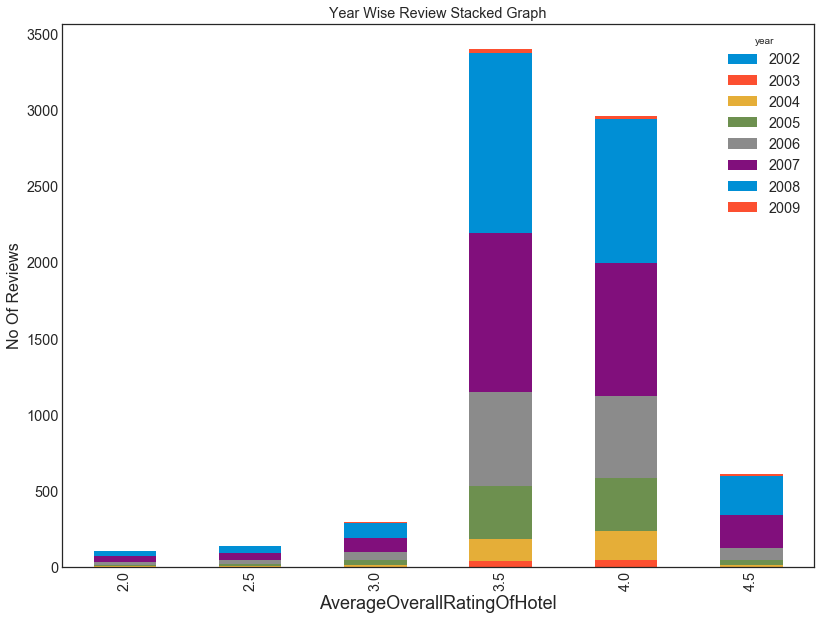

In [50]:
yearwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=True, title= "Year Wise Review Stacked Graph" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

Text(0,0.5,'No Of Reviews')

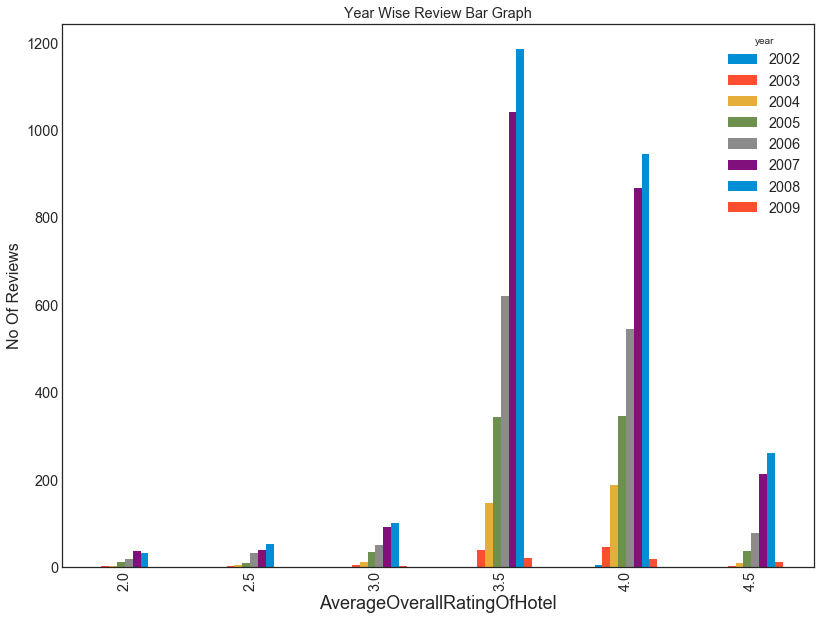

In [51]:
yearwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Year Wise Review Bar Graph" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### Visualising the Quarter Wise reviews Vs Sentiment

Text(0,0.5,'No Of Reviews')

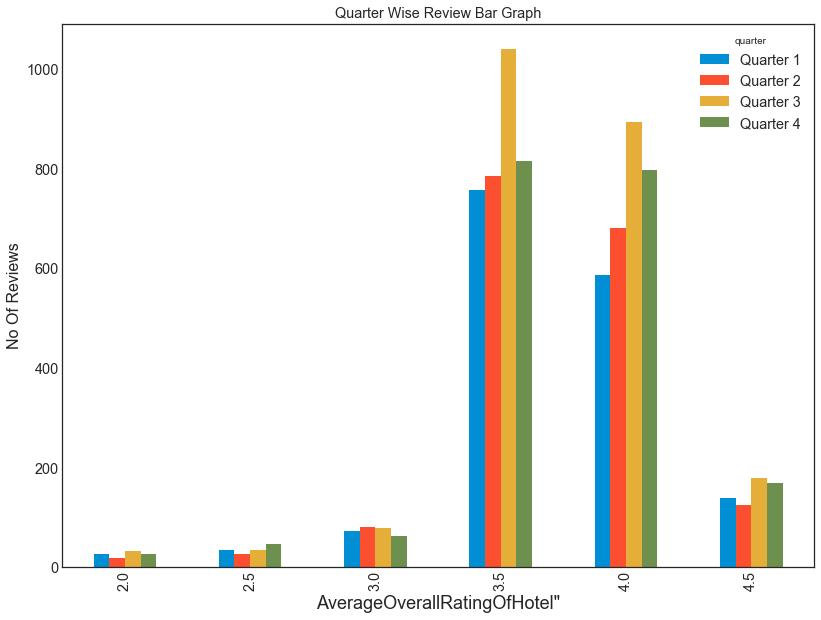

In [52]:
quarterwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Wise Review Bar Graph" )
plt.xlabel('AverageOverallRatingOfHotel"', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### Visulising the month wise reviews vs Sentiment

Text(0,0.5,'No Of Reviews')

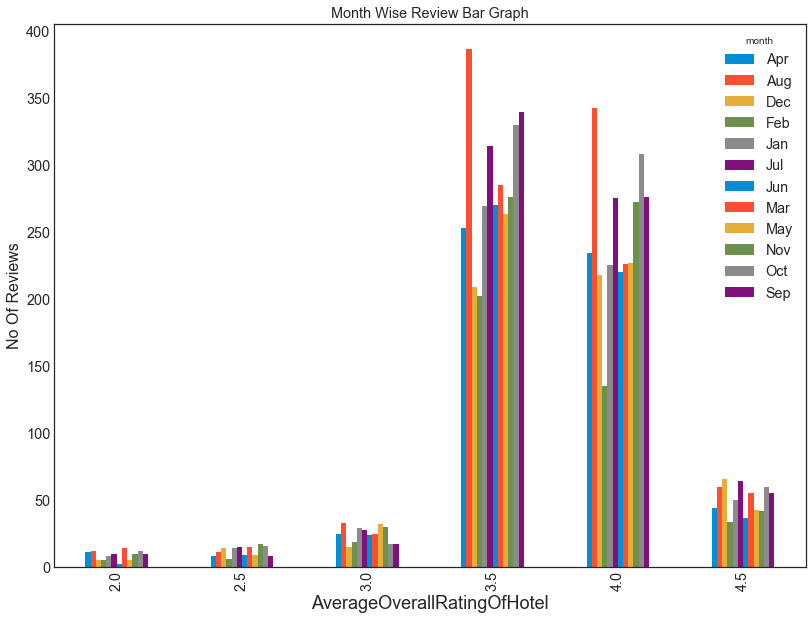

In [53]:
monthwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Month Wise Review Bar Graph" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### From the Quarter Wise Reviews we observed the 3rd Quarter is having more no of reviews

#### Let us seperate Quarter and Month 

In [54]:
quarter_month = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]]
                             )   # Include row and column totals

quarter_month

quarter                     Quarter 1           Quarter 2           Quarter 3  \
month                             Feb  Jan  Mar       Apr  Jun  May       Aug   
AverageOverallRatingOfHotel                                                     
2.0                                 5    8   14        11    2    5        12   
2.5                                 6   14   15         8    9    9        11   
3.0                                19   29   25        25   24   32        33   
3.5                               202  269  285       253  270  263       386   
4.0                               135  225  226       234  220  227       342   
4.5                                34   50   55        44   37   43        60   

quarter                               Quarter 4            
month                        Jul  Sep       Dec  Nov  Oct  
AverageOverallRatingOfHotel                                
2.0                           10   10         5   10   12  
2.5                           15    8        14   17   16  
3.0                           28   17        15   30   17  
3.5                          314  339       209  276  330  
4.0                          275  276       218  272  308  
4.5                           64   55        66   42   60

In [55]:
# Pulling out the third Quarter
quarter_month['Quarter 3']

month                        Aug  Jul  Sep
AverageOverallRatingOfHotel               
2.0                           12   10   10
2.5                           11   15    8
3.0                           33   28   17
3.5                          386  314  339
4.0                          342  275  276
4.5                           60   64   55

In [56]:
high_month = quarter_month['Quarter 3']

Text(0,0.5,'No Of Reviews for 3rd Qaurter')

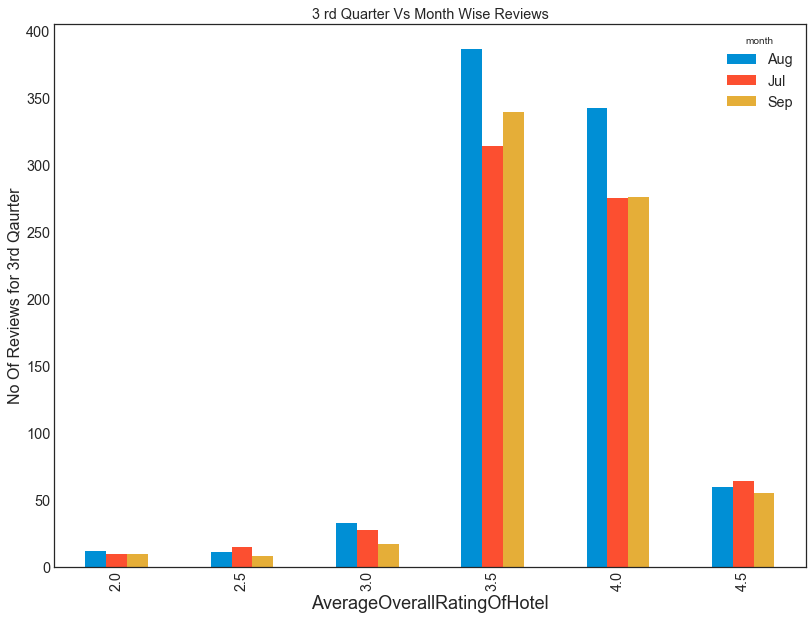

In [57]:
high_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "3 rd Quarter Vs Month Wise Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews for 3rd Qaurter', fontsize=16)

In [58]:
low_month = quarter_month['Quarter 1']

In [59]:
low_month

month                        Feb  Jan  Mar
AverageOverallRatingOfHotel               
2.0                            5    8   14
2.5                            6   14   15
3.0                           19   29   25
3.5                          202  269  285
4.0                          135  225  226
4.5                           34   50   55

Text(0,0.5,'No Of Reviews for 1st Qaurter')

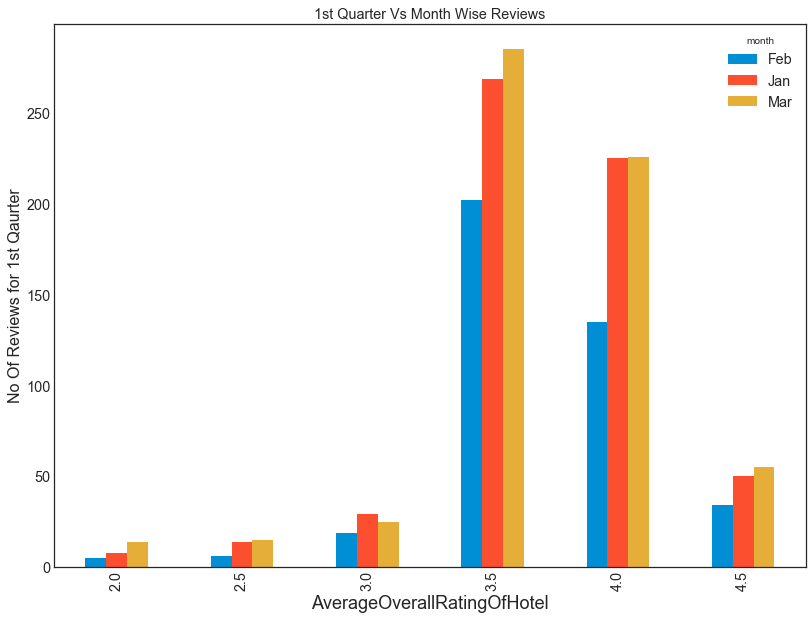

In [60]:
low_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "1st Quarter Vs Month Wise Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews for 1st Qaurter', fontsize=16)

#### Year  Vs Quarter Vs Sentiment

In [61]:
quarter_year = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]]
                             )   # Include row and column totals

quarter_year

year                             2002      2003                                \
quarter                     Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         1         2   
2.5                                 0         0         1         1         0   
3.0                                 0         1         1         0         2   
3.5                                 1         0        11        18        11   
4.0                                 4         1         5        23        17   
4.5                                 0         1         0         2         0   

year                             2004                                    2005  \
quarter                     Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1   
AverageOverallRatingOfHotel                                                     
2.0                                 0         1         1         0         4   
2.5                                 0         2         3         1         3   
3.0                                 3         1         4         3        13   
3.5                                26        30        50        40        61   
4.0                                29        45        54        59        76   
4.5                                 0         2         5         3        11   

year                                                           2006            \
quarter                     Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
AverageOverallRatingOfHotel                                                     
2.0                                 3         3         2         3         2   
2.5                                 2         2         3         3         6   
3.0                                12         6         3         8         9   
3.5                                96       104        82       105       116   
4.0                                84       101        84        94       100   
4.5                                 6         9        10        14        21   

year                                                 2007                      \
quarter                     Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3   
AverageOverallRatingOfHotel                                                     
2.0                                 7         6         9         9         9   
2.5                                15         8         7         5         9   
3.0                                17        16        17        27        26   
3.5                               202       198       229       239       322   
4.0                               183       167       168       201       277   
4.5                                22        21        38        41        71   

year                                       2008                                \
quarter                     Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
AverageOverallRatingOfHotel                                                     
2.0                                 9        11         3        11         8   
2.5                                19        22        10         4        16   
3.0                                21        28        31        25        17   
3.5                               251       315       294       343       232   
4.0                               222       199       246       255       245   
4.5                                62        64        54        70        72   

year                             2009  
quarter                     Quarter 1  
AverageOverallRatingOfHotel            
2.0                                 0  
2.5                                 0  
3.0                                 3  
3.5                                20  
4.0                                19  
4.5                           

Text(0,0.5,'No Of Reviews')

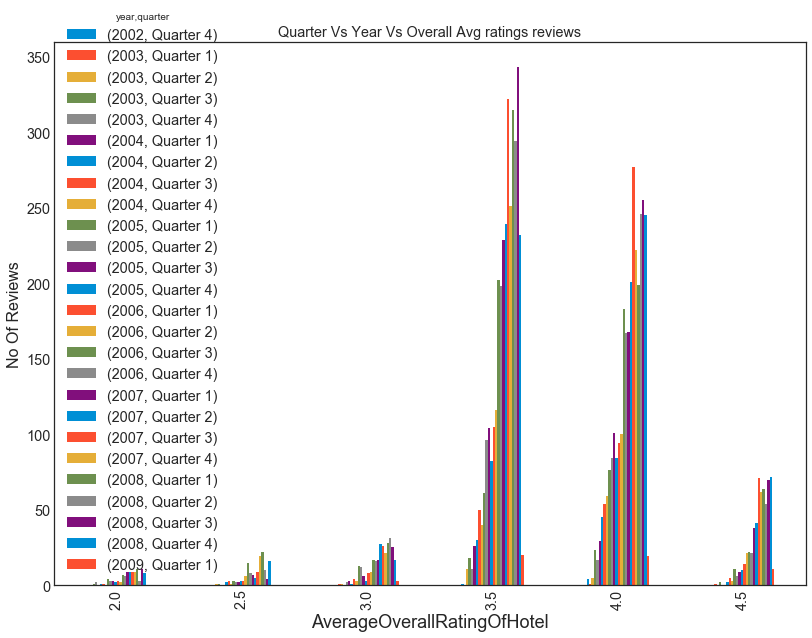

In [62]:
quarter_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Vs Year Vs Overall Avg ratings reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

In [63]:
quarter_2004 = quarter_year[2004]

Text(0,0.5,'No Of Reviews')

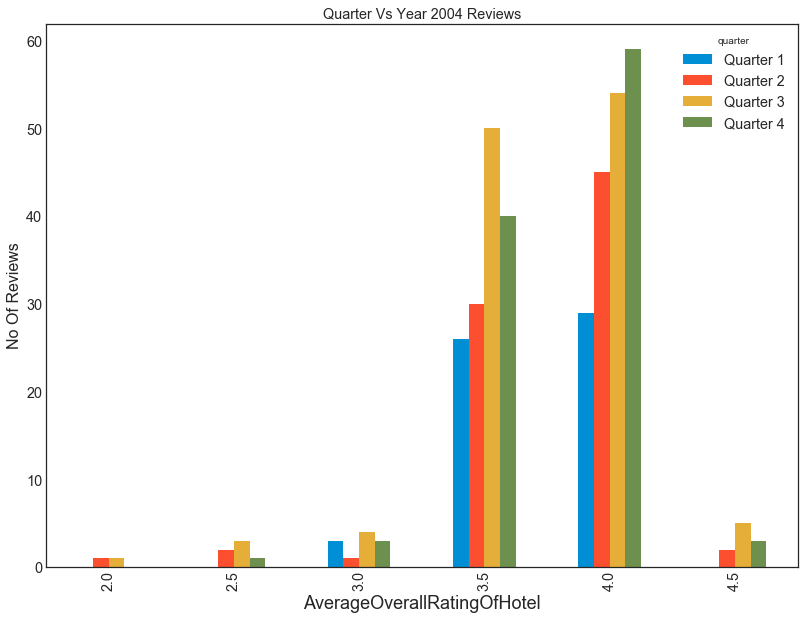

In [64]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us plot all the year wise and Quarter Wise Vs thier Sentiment

Text(0,0.5,'No Of Reviews')

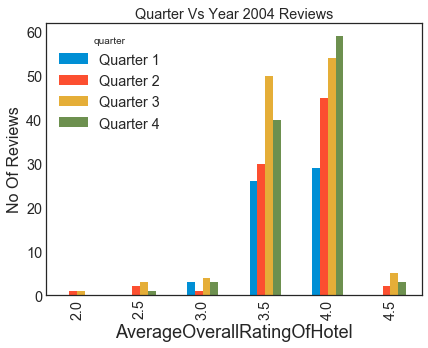

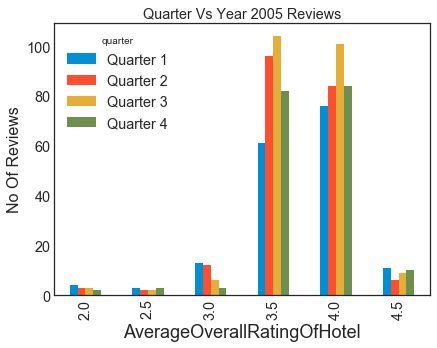

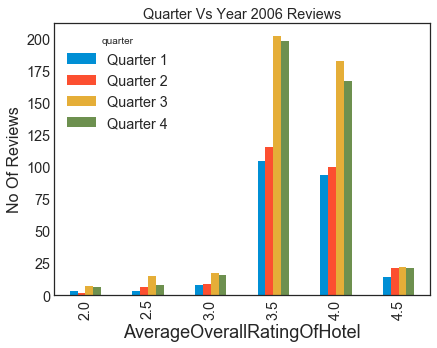

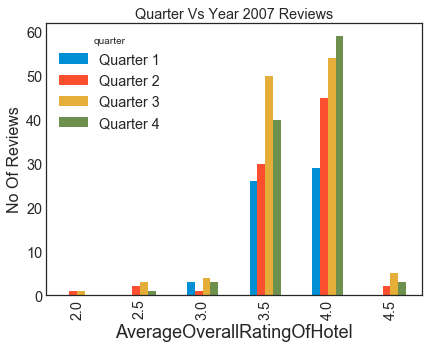

In [65]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)
plt.subplot


quarter_2005 = quarter_year[2005]
quarter_2005.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2005 Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2006 = quarter_year[2006]
quarter_2006.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2006 Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2007 = quarter_year[2007]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2007 Reviews" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

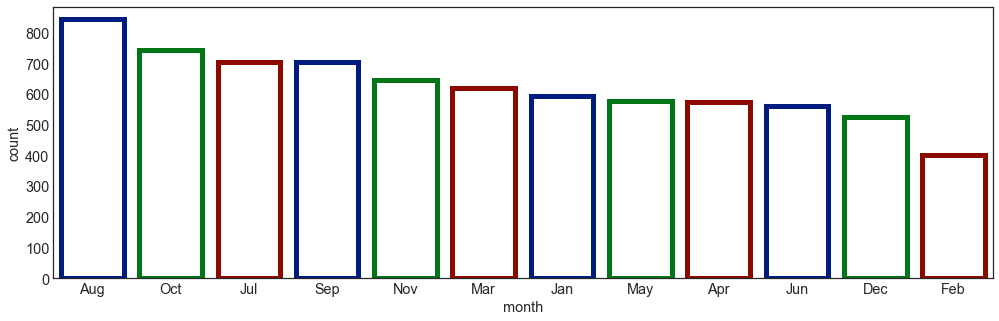

In [66]:
sns.countplot(x='month',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['month'].value_counts().index)

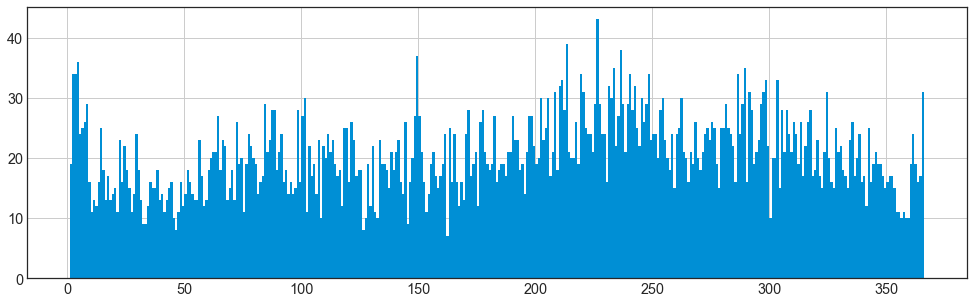

In [67]:
hotels['dayofyear'].hist(bins=365)


### Year 2006, Quarter 3 and August month having High number of reviews <br> Year 2007, Quarter 1 and January are having less no of reviews


#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Precentage Distribution

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


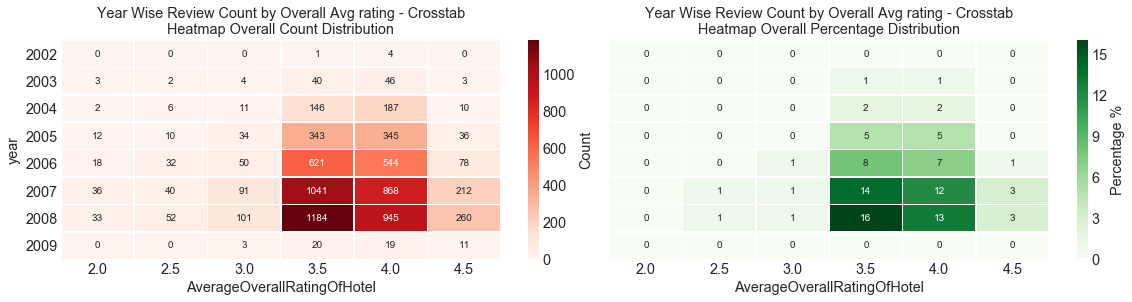

In [68]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["AverageOverallRatingOfHotel"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Year Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['year'], hotels["AverageOverallRatingOfHotel"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


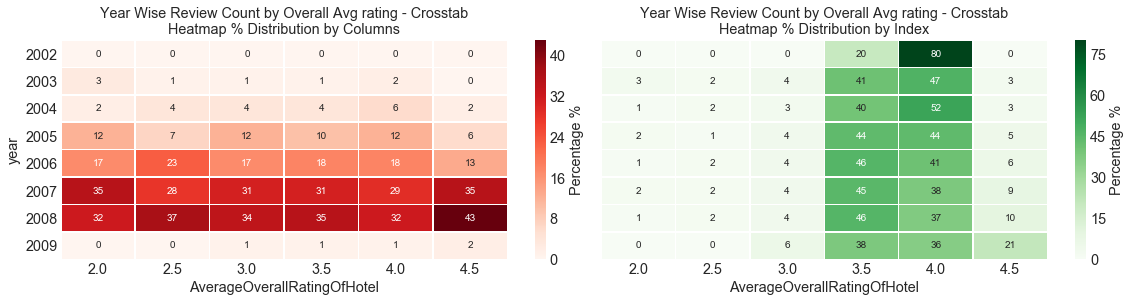

In [69]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["AverageOverallRatingOfHotel"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Year Wise Review Count by Overall Avg rating - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['year'], hotels["AverageOverallRatingOfHotel"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Overall Avg rating - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


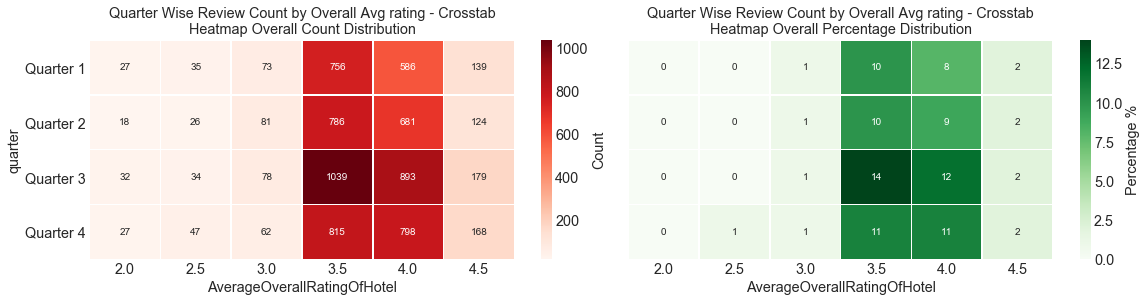

In [70]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["AverageOverallRatingOfHotel"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Quarter Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["AverageOverallRatingOfHotel"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


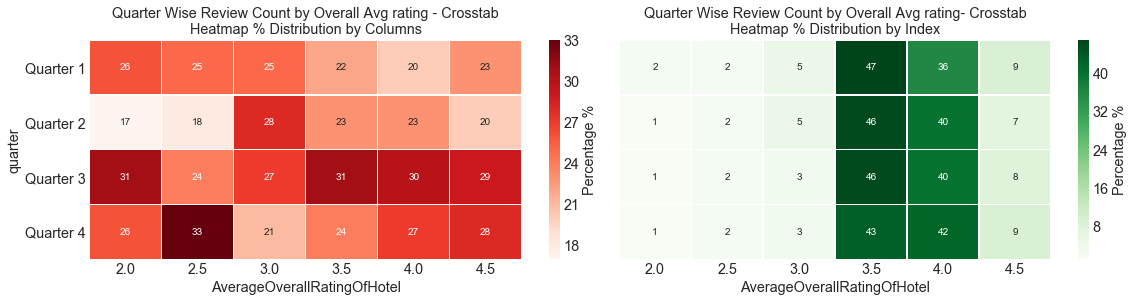

In [71]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["AverageOverallRatingOfHotel"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Quarter Wise Review Count by Overall Avg rating - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["AverageOverallRatingOfHotel"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Overall Avg rating- Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

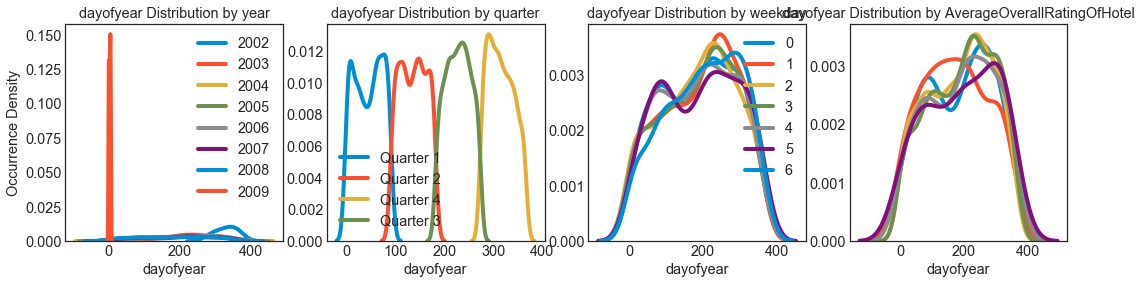

In [72]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "dayofyear"
plotdf = hotels["dayofyear"]
for i,y in enumerate(["year","quarter", "weekday"]):
    for x in set(hotels[y][hotels[y].notnull()]):
        sns.kdeplot(plotdf[hotels[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(hotels["AverageOverallRatingOfHotel"][hotels["AverageOverallRatingOfHotel"].notnull()]):
    sns.kdeplot(plotdf[hotels["AverageOverallRatingOfHotel"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurrence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "AverageOverallRatingOfHotel"))
plt.show()

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


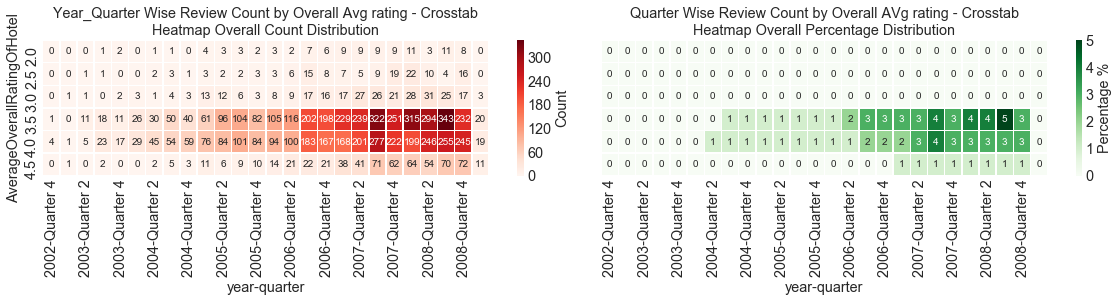

In [73]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Year_Quarter Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Overall AVg rating - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


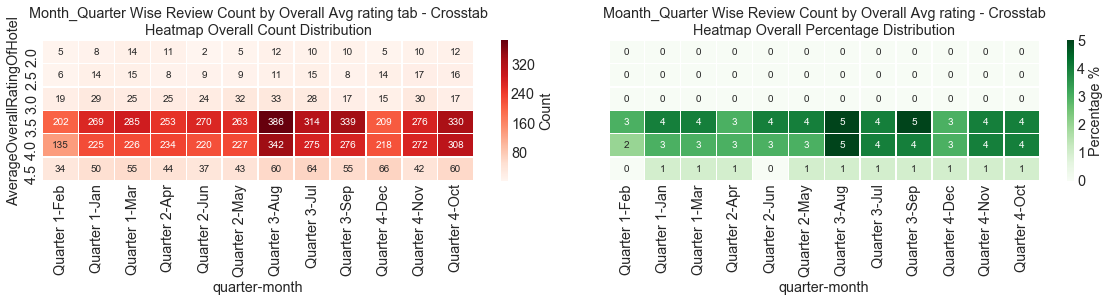

In [74]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Month_Quarter Wise Review Count by Overall Avg rating tab - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Moanth_Quarter Wise Review Count by Overall Avg rating - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

### Checking the hotel having High Reviews

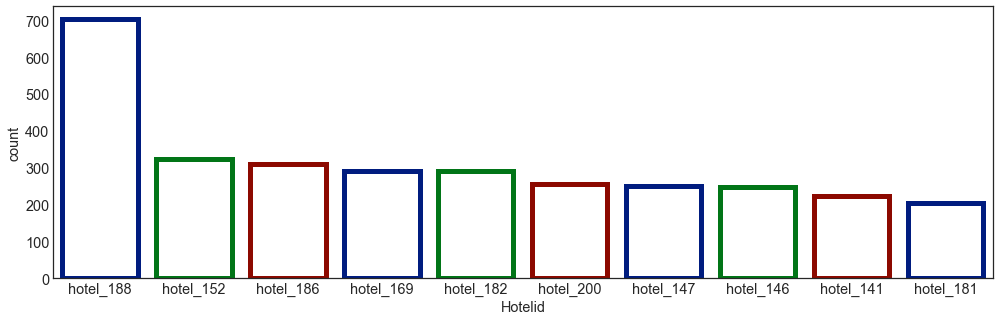

In [75]:
sns.countplot(x='Hotelid',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['Hotelid'].value_counts().head(10).index)

#### hotel_188 is having more number of reviews, Lets see hotel_188 Sentiment distribution

In [76]:
hotelid_avgrating = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["Hotelid"]])   # Include row and column totals

hotelid_avgrating

Hotelid                      hotel_101  hotel_102  hotel_103  hotel_106  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                 40          0          0          0   
4.0                                  0         86         56         64   
4.5                                  0          0          0          0   

Hotelid                      hotel_107  hotel_108  hotel_109  hotel_110  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0         16          0          0   
3.5                                 39          0         18         46   
4.0                                  0          0          0          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_111  hotel_112  hotel_113  hotel_116  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                 38         38          0         26   
3.5                                  0          0          0          0   
4.0                                  0          0         42          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_117  hotel_118  hotel_121  hotel_122  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                 22        203          0          0   
4.0                                  0          0          0        100   
4.5                                  0          0         34          0   

Hotelid                      hotel_123  hotel_124  hotel_127  hotel_128  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                  0         31        202          0   
4.0                                159          0          0        115   
4.5                                  0          0          0          0   

Hotelid                      hotel_129  hotel_132  hotel_135  hotel_137  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0         34          0          0   
3.5                                 56          0          0         47   
4.0                                  0          0        189          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_138  hotel_139  hotel_140  hotel_141  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0         14          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                

In [77]:
hotel_188 = hotelid_avgrating['hotel_188']

In [78]:
hotel_188

AverageOverallRatingOfHotel
2.0      0
2.5      0
3.0      0
3.5      0
4.0    703
4.5      0
Name: hotel_188, dtype: int64

Text(0,0.5,'No Of Reviews')

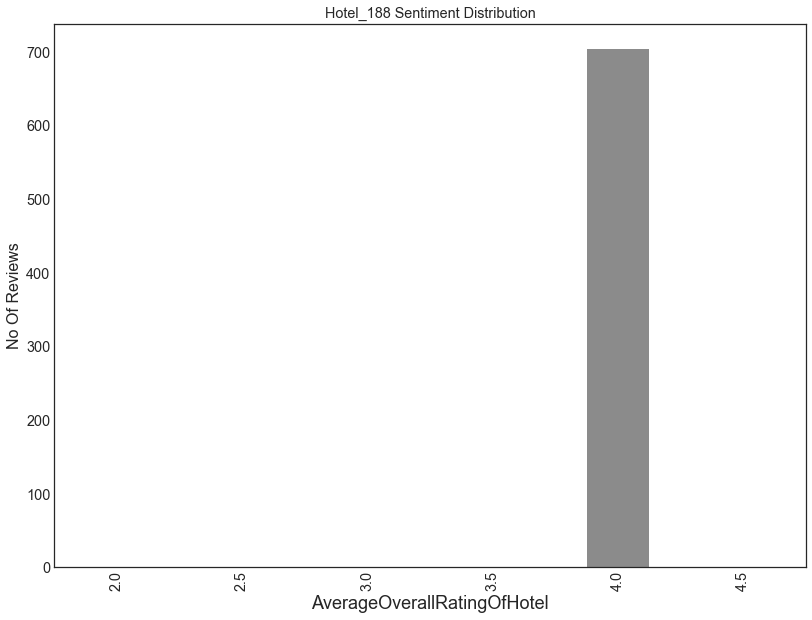

In [79]:
hotel_188.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Sentiment Distribution" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### hotel_188 having more number of 4 ratings

### Let us look at the hotelid_188 year wise Sentiment Distribution

In [80]:
hotelid_year_sentiment = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["Hotelid"],hotels['year']])   # Include row and column totals

hotelid_year_sentiment

Hotelid                     hotel_101                hotel_102                 \
year                             2005 2006 2007 2008      2004 2005 2006 2007   
AverageOverallRatingOfHotel                                                     
2.0                                 0    0    0    0         0    0    0    0   
2.5                                 0    0    0    0         0    0    0    0   
3.0                                 0    0    0    0         0    0    0    0   
3.5                                 3    7   16   14         0    0    0    0   
4.0                                 0    0    0    0         3    7   25   28   
4.5                                 0    0    0    0         0    0    0    0   

Hotelid                          hotel_103                     hotel_106       \
year                        2008      2002 2005 2006 2007 2008      2003 2004   
AverageOverallRatingOfHotel                                                     
2.0                            0         0    0    0    0    0         0    0   
2.5                            0         0    0    0    0    0         0    0   
3.0                            0         0    0    0    0    0         0    0   
3.5                            0         0    0    0    0    0         0    0   
4.0                           23         1    9   15   22    9         1    1   
4.5                            0         0    0    0    0    0         0    0   

Hotelid                                              hotel_107                 \
year                        2005 2006 2007 2008 2009      2004 2005 2006 2007   
AverageOverallRatingOfHotel                                                     
2.0                            0    0    0    0    0         0    0    0    0   
2.5                            0    0    0    0    0         0    0    0    0   
3.0                            0    0    0    0    0         0    0    0    0   
3.5                            0    0    0    0    0         1    7    2    8   
4.0                            4   13   13   31    1         0    0    0    0   
4.5                            0    0    0    0    0         0    0    0    0   

Hotelid                               hotel_108                     hotel_109  \
year                        2008 2009      2005 2006 2007 2008 2009      2005   
AverageOverallRatingOfHotel                                                     
2.0                            0    0         0    0    0    0    0         0   
2.5                            0    0         0    0    0    0    0         0   
3.0                            0    0         2    1    6    6    1         0   
3.5                           20    1         0    0    0    0    0         2   
4.0                            0    0         0    0    0    0    0         0   
4.5                            0    0         0    0    0    0    0         0   

Hotelid                                    hotel_110                      \
year                        2006 2007 2008      2004 2005 2006 2007 2008   
AverageOverallRatingOfHotel                                                
2.0                            0    0    0         0    0    0    0    0   
2.5                            0    0    0         0    0    0    0    0   
3.0                            0    0    0         0    0    0    0    0   
3.5                            4    5    7         2    9    9    9   17   
4.0                            0    0    0         0    0    0    0    0   
4.5                            0    0    0         0    0    0    0    0   

Hotelid                     hotel_111                     hotel_112            \
year                             2004 2005 2006 2007 2008      2004 2005 2006   
AverageOverallRatingOfHotel                                                     
2.0                                 0    0    0    0    0         0    0    0   
2.5                                 0    0    0    0    0         0    

In [81]:
hotel_188_year = hotelid_year_sentiment['hotel_188']

In [82]:
hotel_188_year

year                         2003  2004  2005  2006  2007  2008  2009
AverageOverallRatingOfHotel                                          
2.0                             0     0     0     0     0     0     0
2.5                             0     0     0     0     0     0     0
3.0                             0     0     0     0     0     0     0
3.5                             0     0     0     0     0     0     0
4.0                            18    54   131   147   189   161     3
4.5                             0     0     0     0     0     0     0

Text(0,0.5,'No Of Reviews')

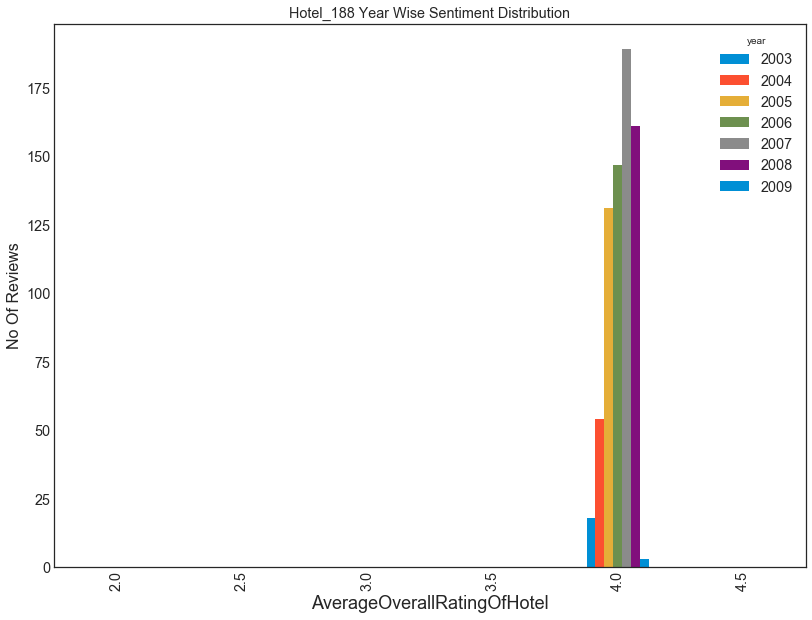

In [83]:
hotel_188_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Year Wise Sentiment Distribution" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us look at the hotelid_188 quarter wise Sentiment Distribution

In [84]:
hotelid_quarter_sentiment = pd.crosstab(index=hotels["AverageOverallRatingOfHotel"], 
                             columns=[hotels["Hotelid"],hotels['quarter']])   # Include row and column totals

hotelid_quarter_sentiment

Hotelid                     hotel_101                               hotel_102  \
quarter                     Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                                 0         0         0         0         0   
3.0                                 0         0         0         0         0   
3.5                                 6        11        12        11         0   
4.0                                 0         0         0         0         8   
4.5                                 0         0         0         0         0   

Hotelid                                                   hotel_103            \
quarter                     Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                                 0         0         0         0         0   
3.0                                 0         0         0         0         0   
3.5                                 0         0         0         0         0   
4.0                                21        41        16        14        13   
4.5                                 0         0         0         0         0   

Hotelid                                         hotel_106                      \
quarter                     Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                                 0         0         0         0         0   
3.0                                 0         0         0         0         0   
3.5                                 0         0         0         0         0   
4.0                                 9        20        10         7        19   
4.5                                 0         0         0         0         0   

Hotelid                               hotel_107                                \
quarter                     Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                                 0         0         0         0         0   
3.0                                 0         0         0         0         0   
3.5                                 0         8        17         9         5   
4.0                                28         0         0         0         0   
4.5                                 0         0         0         0         0   

Hotelid                     hotel_108                               hotel_109  \
quarter                     Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                                 0         0         0         0         0   
3.0                                 7         3         1         5         0   
3.5                                 0         0         0         0         6   
4.0                                 0         0         0         0         0   
4.5                                 0         0         0         0         0   

Hotelid                                                   hotel_110            \
quarter                     Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
AverageOverallRatingOfHotel                                                     
2.0                                 0         0         0         0         0   
2.5                       

In [85]:
hotel_188_quarter = hotelid_quarter_sentiment['hotel_188']

In [86]:
hotel_188_quarter

quarter                      Quarter 1  Quarter 2  Quarter 3  Quarter 4
AverageOverallRatingOfHotel                                            
2.0                                  0          0          0          0
2.5                                  0          0          0          0
3.0                                  0          0          0          0
3.5                                  0          0          0          0
4.0                                171        165        190        177
4.5                                  0          0          0          0

Text(0,0.5,'No Of Reviews')

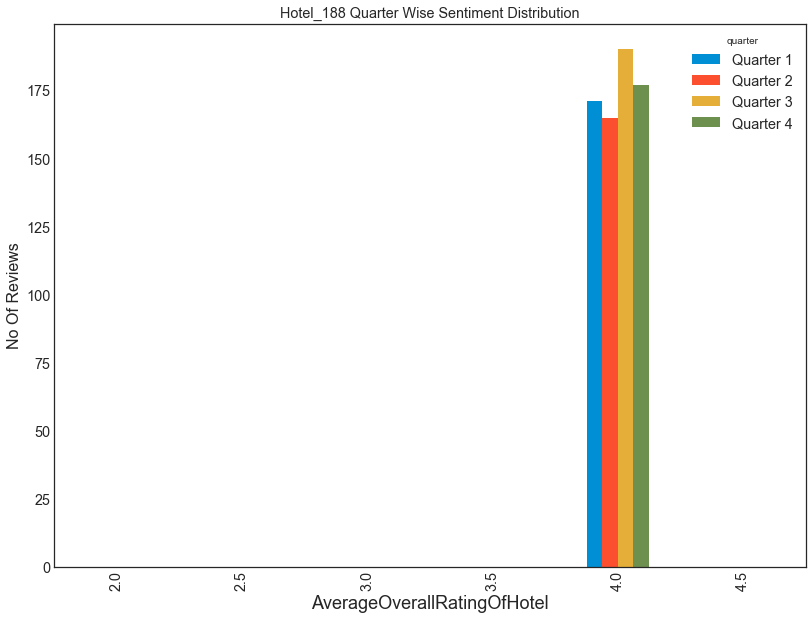

In [87]:
hotel_188_quarter.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Quarter Wise Sentiment Distribution" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### As compared to overall Sentimnet hotelid_188 is having slightly more or equal no of review in Q3 and Q4 <br> Also good reviews are high in Q1 and Q2 when compared to Q3 and Q4, this is interesting when compared to over sentiment distribution

# Exploring Text and visulaizing to get insights from it

In [88]:
pd.set_option('max_colwidth', 500)

In [89]:
df = hotels

In [90]:
hotels.dtypes


Hotelid                                object
userid                                 object
reviewtext                             object
Date                           datetime64[ns]
NoOfReaders                             int64
HelpfulToNoOfreaders                    int64
Value_rating                            int64
Rooms_rating                            int64
Location_rating                         int64
Cleanliness_rating                      int64
Checkin_rating                          int64
Service_rating                          int64
Businessservice_rating                  int64
AverageOverallRatingOfHotel           float64
AveragePricing                          int64
year                                    int64
month                                  object
dayofmonth                              int64
dayofyear                               int64
week                                    int64
weekofyear                              int64
dayofweek                         

In [91]:
df[["Hotelid","reviewtext", "NoOfReaders", "HelpfulToNoOfreaders", "Value_rating", "Rooms_rating", "Location_rating", "Cleanliness_rating", "Checkin_rating", "Service_rating", "Businessservice_rating", "AverageOverallRatingOfHotel", "AveragePricing"]].sample(7)

Hotelid  \
21    hotel_101   
7324  hotel_200   
5523  hotel_181   
3420  hotel_152   
4738  hotel_169   
7229  hotel_198   
1653  hotel_135   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
21    Great Staff We stayed overnight the last week of May, flying out in the morning. We had no problem leaving our car except, when we checked in they asked for our AAA card. Evidently the rate we got for park, sleep and fly was for AAA members only. This was not an option or even mentioned on their web reservation form. The front desk quickly recognized this as their error and we were off to our super comfy room. We had a great dinner in the restaurant. Super efficient drop off on departure day...   
7324  Wonderful find in NYC! Great hotel! We went for a weekend trip and wanted to stay in a part of town less congested and touristy than Times Square. Hotel Giraffe is in a wonderful location with great restaurants within walking distance. The staff was very nice and accomodating from the minute we arrived. The rooms are a great size by New York standards, and even had a small balcony! We stayed three adults in a room and had lots of room. Bathrooms were a great size and everything was very clea...   
5523                                                                                    Just an average hotel the low ceilings in the lobby and shabby elevators kind of spoiled this hotel; the rooms are small but comfortable and the staff was helpful for the most part. There was no free wireless internet and the workout room was a joke, however I got directions to a health club on Boylston street which was nice. The location is good- however I would rather stay at one of the hotels near Copley place.   
3420  Do believe the bad reviews of Westin St Francis ! I was very nervous when the Westin St Francis popped up as the accepted hotel on my Priceline bid due to the consistent poor reviews on this site. Needless to say, the reviews are all quite accurate.Upon check in , the staff person was pleasant and did upgrade us to a Tower view room which is suppose to have better rooms than the older section. If this is true, then I shudder to think what one would find in those rooms.The view was nice and r...   
4738  Mold in the Miami's Newport Beachside Hotel and Resort My experience with the Newport Beachside Miami was not very good.I was charged a parking fee even though I had no car (I complained and it was removed). I wasn't aware of a $8 mandatory resort fee, which is not mentioned anywhere until it shows up on your bill ( I did not have the time to use the pool or any of the resort options). I found the front desk to be unfriendly and the rooms are definitely not very clean. But the BIG problem wa...   
7229  Convenient mall location, clean and large rooms Location:Was in town for a conference that was also taking place at the hotel. The fact that the conference was in the hotel along with the fact that the hotel is attached to the Galleria mall made for a very convenient business trip. I didn't have a car and really didn't need one seeing that food and shopping and the conference were all accessible. Food and Shopping:There is a corner bakery in the mall steps away from the elevator which made f...   
1653                                                                                                                                                                                                                                                                                                

In [92]:
df = df[["Hotelid","reviewtext", "NoOfReaders", "HelpfulToNoOfreaders", "Value_rating", "Rooms_rating", "Location_rating", "Cleanliness_rating", "Checkin_rating", "Service_rating", "Businessservice_rating", "AverageOverallRatingOfHotel", "AveragePricing"]]

In [93]:
df.describe()

NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
count  7504.000000           7504.000000   7504.000000   7504.000000   
mean      3.394856              2.701493      3.986141      4.006130   
std       4.540590              3.579700      1.850848      1.809968   
min       0.000000              0.000000      1.000000      1.000000   
25%       1.000000              0.000000      2.000000      3.000000   
50%       2.000000              2.000000      5.000000      5.000000   
75%       5.000000              4.000000      6.000000      5.000000   
max      64.000000             55.000000      6.000000      6.000000   

       Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
count      7504.000000         7504.000000     7504.000000     7504.000000   
mean          3.787180            4.219483        3.602479        4.003731   
std           2.160467            1.868013        2.109845        1.912866   
min           1.000000            1.000000        1.000000        1.000000   
25%           1.000000            3.000000        1.000000        2.000000   
50%           5.000000            5.000000        4.000000        5.000000   
75%           6.000000            6.000000        6.000000        6.000000   
max           6.000000            6.000000        6.000000        6.000000   

       Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
count             7504.000000                  7504.000000     7504.000000  
mean                 2.538913                     3.719083      272.865538  
std                  1.924838                     0.437912       89.116916  
min                  1.000000                     2.000000       70.000000  
25%                  1.000000                     3.500000      204.000000  
50%                  1.000000                     3.500000      265.000000  
75%                  4.000000                     4.000000      360.000000  
max                  6.000000                     4.500000      502.000000

In [94]:
df.head()

Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   
3  hotel_101   
4  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0  Just An Average stay This was just an average stay, with nothing standing out. If the weather is good, I would recommend eating at the 13 Coins Restaurant which is a short walk from the Marriott, versus eating at the hotel restaurant. There is also a 7 Eleven about a block away if one needs other things. This is a typical Marriott, where they charge you for everything, including the Internet. What bothered me most was when I had to leave at 4:30am, and was waiting for my ride in the lobby, t...   
1                                                                                                                                                            go elsewhere The place is hugely overpriced and mis-managed.Better places to stay are the Hilton or Radisson, both of which are in the same airport area.I arrived and had to walk down endless corridors before finding out my key did not work. Finally got another room, other people's hairs in the bathtub. Gross, small, old-school and pricey.Yuk!   
2  I Won't Go Back I stayed at the hotel 11/14/08 for 2 nights. I booked the package through Marriotts web site. The package incuded a deluxe room, free parking and a gas card. When we checked in we were told our room was not ready but they could give a handicapped room. I asked to look at the room. It was on the first floor facing the street and parking lot. I went back and said we would wait for our room. We came back 2 hours later and they gave me keys to room 199 which was 3 rooms away from...   
3  Good weekend stay My wife and I stay here quite regularly when we visit Seattle to see a football game. The shuttle from the airport is always on time and operates almost 24 hours a day. The rooms are typical Marriott and always clean and functional. The restaurant is good with some very good items and others quite normal. If there is a large convention in the hotel (which occurs quite regularly on weekends) be careful where your room is(stay away from pool side). The hotel is old but has be...   
4  Great airport stay Lovely indoor pool area, looks like a lodge. Staff was friendly and helpful. Room was clean, very comfortable and spacious, with minimal noise from outside (you could hear planes, but only if you really listened for them). The breakfast buffet was good value with great coffee (Starbucks), but the omelet chef did not have the slightest clue as to what he was doing. I got more of a scramble than an omelet, and he might have put all of three spinach leaves in the whole thing,...   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   
3            0                     0             5             5   
4            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservic

In [95]:
df.tail()

Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                                       reviewtext  \
7499        Un hotel encantador, muy recomendable   showReview(19062498, 'full');   
7500                                 Buon albergo   showReview(15155815, 'full');   
7501                         Un hotel eccezionale   showReview(14980612, 'full');   
7502                                       Ottimo   showReview(14599783, 'full');   
7503  Un relax en el ritmo trepidante de New York   showReview(14443615, 'full');   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

#### Cleaning the data using few regular expressions

In [96]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\!!\!!!\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r"$", "")
    df[text_field] = df[text_field].str.lower()
    return df


In [97]:
df = standardize_text(df, "reviewtext")

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
df.head()

Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   
3  hotel_101   
4  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0  just an average stay this was just an average stay, with nothing standing out  if the weather is good, i would recommend eating at the 13 coins restaurant which is a short walk from the marriott, versus eating at the hotel restaurant  there is also a 7 eleven about a block away if one needs other things  this is a typical marriott, where they charge you for everything, including the internet  what bothered me most was when i had to leave at 4 30am, and was waiting for my ride in the lobby, t...   
1                                                                                                                                                            go elsewhere the place is hugely overpriced and mis managed better places to stay are the hilton or radisson, both of which are in the same airport area i arrived and had to walk down endless corridors before finding out my key did not work  finally got another room, other people's hairs in the bathtub  gross, small, old school and pricey yuk!   
2  i won't go back i stayed at the hotel 11 14 08 for 2 nights  i booked the package through marriotts web site  the package incuded a deluxe room, free parking and a gas card  when we checked in we were told our room was not ready but they could give a handicapped room  i asked to look at the room  it was on the first floor facing the street and parking lot  i went back and said we would wait for our room  we came back 2 hours later and they gave me keys to room 199 which was 3 rooms away from...   
3  good weekend stay my wife and i stay here quite regularly when we visit seattle to see a football game  the shuttle from the airport is always on time and operates almost 24 hours a day  the rooms are typical marriott and always clean and functional  the restaurant is good with some very good items and others quite normal  if there is a large convention in the hotel (which occurs quite regularly on weekends) be careful where your room is(stay away from pool side)  the hotel is old but has be...   
4  great airport stay lovely indoor pool area, looks like a lodge  staff was friendly and helpful  room was clean, very comfortable and spacious, with minimal noise from outside (you could hear planes, but only if you really listened for them)  the breakfast buffet was good value with great coffee (starbucks), but the omelet chef did not have the slightest clue as to what he was doing  i got more of a scramble than an omelet, and he might have put all of three spinach leaves in the whole thing,...   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   
3            0                     0             5             5   
4            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservic

In [99]:
df.tail()

Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                                       reviewtext  \
7499        un hotel encantador, muy recomendable   showreview(19062498, 'full')    
7500                                 buon albergo   showreview(15155815, 'full')    
7501                         un hotel eccezionale   showreview(14980612, 'full')    
7502                                       ottimo   showreview(14599783, 'full')    
7503  un relax en el ritmo trepidante de new york   showreview(14443615, 'full')    

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

In [100]:
df.describe()

NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
count  7504.000000           7504.000000   7504.000000   7504.000000   
mean      3.394856              2.701493      3.986141      4.006130   
std       4.540590              3.579700      1.850848      1.809968   
min       0.000000              0.000000      1.000000      1.000000   
25%       1.000000              0.000000      2.000000      3.000000   
50%       2.000000              2.000000      5.000000      5.000000   
75%       5.000000              4.000000      6.000000      5.000000   
max      64.000000             55.000000      6.000000      6.000000   

       Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
count      7504.000000         7504.000000     7504.000000     7504.000000   
mean          3.787180            4.219483        3.602479        4.003731   
std           2.160467            1.868013        2.109845        1.912866   
min           1.000000            1.000000        1.000000        1.000000   
25%           1.000000            3.000000        1.000000        2.000000   
50%           5.000000            5.000000        4.000000        5.000000   
75%           6.000000            6.000000        6.000000        6.000000   
max           6.000000            6.000000        6.000000        6.000000   

       Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
count             7504.000000                  7504.000000     7504.000000  
mean                 2.538913                     3.719083      272.865538  
std                  1.924838                     0.437912       89.116916  
min                  1.000000                     2.000000       70.000000  
25%                  1.000000                     3.500000      204.000000  
50%                  1.000000                     3.500000      265.000000  
75%                  4.000000                     4.000000      360.000000  
max                  6.000000                     4.500000      502.000000

### Removing punctions

In [101]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [102]:
df['reviewtext'] = df['reviewtext'].apply(remove_punctuation)
df.tail()

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                                  reviewtext  \
7499         un hotel encantador muy recomendable   showreview19062498 full    
7500                                 buon albergo   showreview15155815 full    
7501                         un hotel eccezionale   showreview14980612 full    
7502                                       ottimo   showreview14599783 full    
7503  un relax en el ritmo trepidante de new york   showreview14443615 full    

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

#### Saving the cleaned data to disk for future reference

In [103]:
df.to_csv("df_clean_data.csv")

In [104]:
df.groupby("AverageOverallRatingOfHotel").count()

Hotelid  reviewtext  NoOfReaders  \
AverageOverallRatingOfHotel                                     
2.0                              104         104          104   
2.5                              142         142          142   
3.0                              294         294          294   
3.5                             3396        3396         3396   
4.0                             2958        2958         2958   
4.5                              610         610          610   

                             HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
AverageOverallRatingOfHotel                                                     
2.0                                           104           104           104   
2.5                                           142           142           142   
3.0                                           294           294           294   
3.5                                          3396          3396          3396   
4.0                                          2958          2958          2958   
4.5                                           610           610           610   

                             Location_rating  Cleanliness_rating  \
AverageOverallRatingOfHotel                                        
2.0                                      104                 104   
2.5                                      142                 142   
3.0                                      294                 294   
3.5                                     3396                3396   
4.0                                     2958                2958   
4.5                                      610                 610   

                             Checkin_rating  Service_rating  \
AverageOverallRatingOfHotel                                   
2.0                                     104             104   
2.5                                     142             142   
3.0                                     294             294   
3.5                                    3396            3396   
4.0                                    2958            2958   
4.5                                     610             610   

                             Businessservice_rating  AveragePricing  
AverageOverallRatingOfHotel                                          
2.0                                             104             104  
2.5                                             142             142  
3.0                                             294             294  
3.5                                            3396            3396  
4.0                                            2958            2958  
4.5                                             610             610

#### Without removing stop words

In [105]:
text = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6542875 words in the combination of all review.


#### Visualizing the most frequent words using word cloud

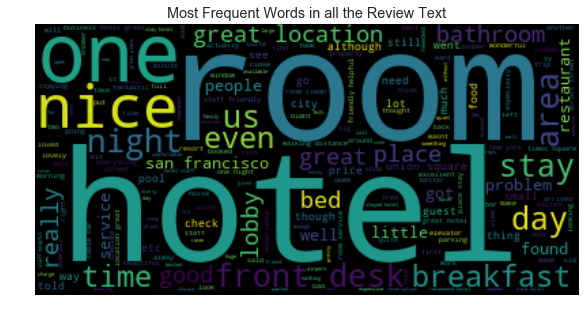

In [106]:
wordcloud = WordCloud(background_color="Black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Words in all the Review Text")
plt.axis("off")
plt.show()

In [107]:
df.dtypes


Hotelid                         object
reviewtext                      object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                   int64
dtype: object

#### Seperating the Text for Different Sentiments and Visulaizing the most frequent words for each Sentiment

In [108]:
avgrat2 = " ".join([review for review in df[df["AverageOverallRatingOfHotel"]==2].reviewtext])
avgrat2_5 = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==2.5].reviewtext)
avgrat3 = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==3].reviewtext)                                          
avgrat3_5 = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==3.5].reviewtext)
avgrat4 = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==4].reviewtext)
avgrat4_5 = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==4.5].reviewtext)

        

                                                                                              


#### Word Cloud for avgrat2

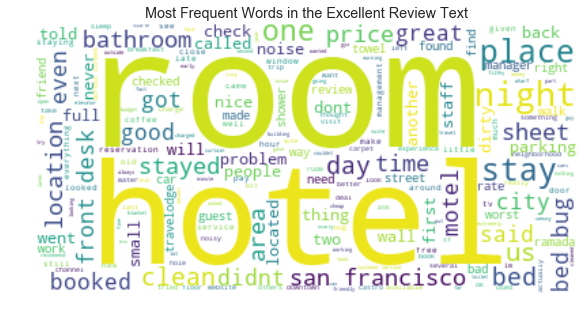

In [109]:
wordcloud_avgrat2 = WordCloud(background_color="white").generate(avgrat2)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat2, interpolation='bilinear')
plt.title("Most Frequent Words in the Excellent Review Text")
plt.axis("off")
plt.show()

#### Word Cloud for avgrating 2.5

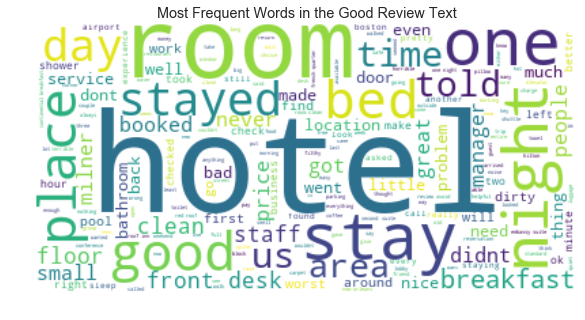

In [110]:
wordcloud_avg2_5 = WordCloud( background_color="white").generate(avgrat2_5)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avg2_5, interpolation='bilinear')
plt.title("Most Frequent Words in the Good Review Text")
plt.axis("off")
plt.show()

#### Word Cloud for avg rating 3.0

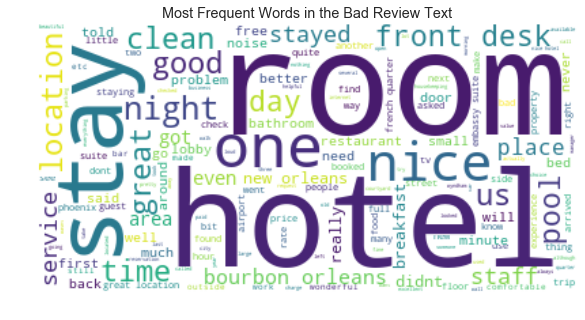

In [111]:
wordcloud_avg3 = WordCloud(background_color="white").generate(avgrat3)
plt.imshow(wordcloud_avg3, interpolation='bilinear')
plt.title("Most Frequent Words in the Bad Review Text")
plt.axis("off")
plt.show()

# Word Cloud for avg rating 3.5


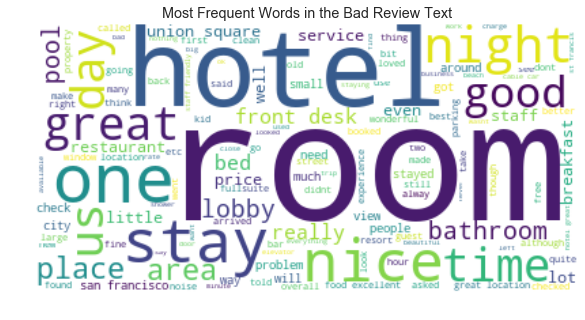

In [112]:
wordcloud_avg3_5 = WordCloud(background_color="white").generate(avgrat3_5)
plt.imshow(wordcloud_avg3_5, interpolation='bilinear')
plt.title("Most Frequent Words in the Bad Review Text")
plt.axis("off")
plt.show()

# Word Cloud for avg rating 4.0

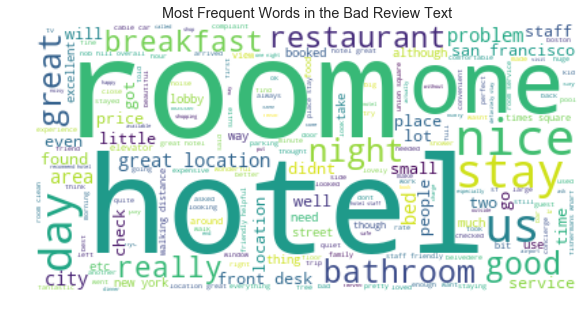

In [113]:
wordcloud_avg4 = WordCloud(background_color="white").generate(avgrat4)
plt.imshow(wordcloud_avg4, interpolation='bilinear')
plt.title("Most Frequent Words in the Bad Review Text")
plt.axis("off")
plt.show()

# Word Cloud for avg rating 4.5

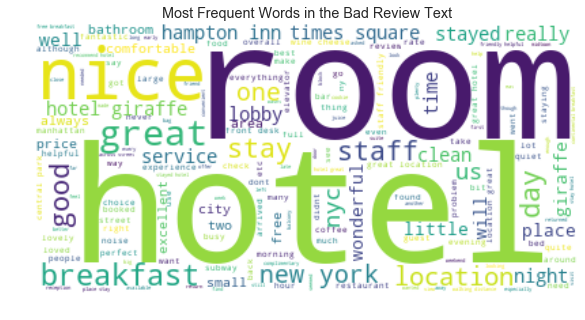

In [114]:
wordcloud_avg4_5 = WordCloud(background_color="white").generate(avgrat4_5)
plt.imshow(wordcloud_avg4_5, interpolation='bilinear')
plt.title("Most Frequent Words in the Bad Review Text")
plt.axis("off")
plt.show()

#### Removing Stop Words

In [115]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>
  return concat([self.open(f).read() for f in fileids])


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [116]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [117]:
df.tail()

Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                                  reviewtext  \
7499         un hotel encantador muy recomendable   showreview19062498 full    
7500                                 buon albergo   showreview15155815 full    
7501                         un hotel eccezionale   showreview14980612 full    
7502                                       ottimo   showreview14599783 full    
7503  un relax en el ritmo trepidante de new york   showreview14443615 full    

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

In [118]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [119]:
df['reviewtext'] = df['reviewtext'].apply(stopwords)
df.tail()

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                               reviewtext  \
7499         un hotel encantador muy recomendable showreview19062498 full   
7500                                 buon albergo showreview15155815 full   
7501                         un hotel eccezionale showreview14980612 full   
7502                                       ottimo showreview14599783 full   
7503  un relax en el ritmo trepidante de new york showreview14443615 full   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

In [120]:
text_afterstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after stop words removal.".format(len(text_afterstop)))

There are 4209703 words in the combination of all review after stop words removal.


#### There are few words appearing more no of times in all the sentiment classes whcih actually do not contribute to Sentiment class. Updating the stop words list with those most repeating words

In [121]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['hotel','one','us','stay','day','us','night','also','room', 'rooms']
stopwords.extend(newStopWords)

C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>
  return concat([self.open(f).read() for f in fileids])


In [122]:
print("Number of new stopwords: ", len(stopwords))

Number of new stopwords:  189


In [123]:
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df.tail()

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Hotelid  \
7499  hotel_200   
7500  hotel_200   
7501  hotel_200   
7502  hotel_200   
7503  hotel_200   

                                                               reviewtext  \
7499               un encantador muy recomendable showreview19062498 full   
7500                                 buon albergo showreview15155815 full   
7501                               un eccezionale showreview14980612 full   
7502                                       ottimo showreview14599783 full   
7503  un relax en el ritmo trepidante de new york showreview14443615 full   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7499            0                     0             5             6   
7500            0                     0             4             5   
7501            0                     0             6             6   
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7499                6                   6               6               6   
7500                5                   4               5               5   
7501                6                   6               6               6   
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  
7499                       5                          4.5             370  
7500                       4                          4.5             370  
7501                       6                          4.5             370  
7502                       5                          4.5             370  
7503                       6                          4.5             370

In [124]:
text_afternewstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after new stop words removal.".format(len(text_afternewstop)))

There are 3936165 words in the combination of all review after new stop words removal.


#### Checking the most frequnt occuring words

In [125]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       7057
location    4684
would       4535
good        4446
staff       4296
nice        4084
stayed      3467
clean       3046
get         2636
service     2629
dtype: int64

In [126]:
df.head()

Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   
3  hotel_101   
4  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   
3                                                                                                         good weekend wife quite regularly visit seattle see football game shuttle airport always time operates almost 24 hours typical marriott always clean functional restaurant good good items others quite normal large convention occurs quite regularly weekends careful isstay away pool side old remodeled recently noise hallways especially around pool annoying standard complaint charge internet usage   
4                                                                                      great airport lovely indoor pool area looks like lodge staff friendly helpful clean comfortable spacious minimal noise outside could hear planes really listened breakfast buffet good value great coffee starbucks omelet chef slightest clue got scramble omelet might put three spinach leaves whole thing cooked nothing booked cars eat free package included parking 25 gas card still deal worth overall good experience   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   
3            0                     0             5             5   
4            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservic

### Spelling Correction

In [127]:
#! pip install TextBlob

In [128]:
#df['reviewtext'] = df['reviewtext'].apply(lambda x: str(TextBlob(x).correct()))

In [129]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head()

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   
3  hotel_101   
4  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   
3                                                                                                         good weekend wife quite regularly visit seattle see football game shuttle airport always time operates almost 24 hours typical marriott always clean functional restaurant good good items others quite normal large convention occurs quite regularly weekends careful isstay away pool side old remodeled recently noise hallways especially around pool annoying standard complaint charge internet usage   
4                                                                                      great airport lovely indoor pool area looks like lodge staff friendly helpful clean comfortable spacious minimal noise outside could hear planes really listened breakfast buffet good value great coffee starbucks omelet chef slightest clue got scramble omelet might put three spinach leaves whole thing cooked nothing booked cars eat free package included parking 25 gas card still deal worth overall good experience   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   
3            0                     0             5             5   
4            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservic

In [130]:
text_final = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text_final)))

There are 3936165 words in the combination of all review.


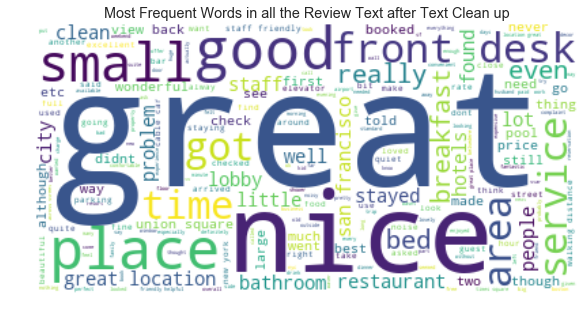

In [131]:
wordcloud = WordCloud(background_color="white").generate(text_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Words in all the Review Text after Text Clean up")
plt.axis("off")
plt.show()

In [132]:
avgrat2_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==2.0].reviewtext)
avgrat2_5_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==2.5].reviewtext)
avgrat3_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==3.0].reviewtext)
avgrat3_5_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==3.5].reviewtext)
avgrat4_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==4.0].reviewtext)
avgrat4_5_final = " ".join(review for review in df[df["AverageOverallRatingOfHotel"]==4.5].reviewtext)

### Let us look at the word cloud for each rating Class

#### For overall average grating = 2.0

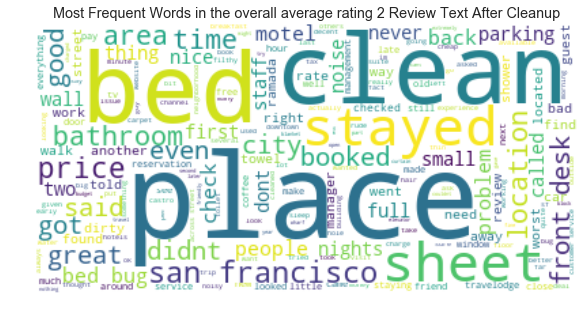

In [133]:
wordcloud_avgrat2_final = WordCloud( background_color="white").generate(avgrat2_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat2_final, interpolation='bilinear')
plt.title("Most Frequent Words in the overall average rating 2 Review Text After Cleanup")
plt.axis("off")
plt.show()

#### Now the above word cloud make sense for Excellent Sentiment as it has words like great, nice, staff

#### For overall average grating = 2.5

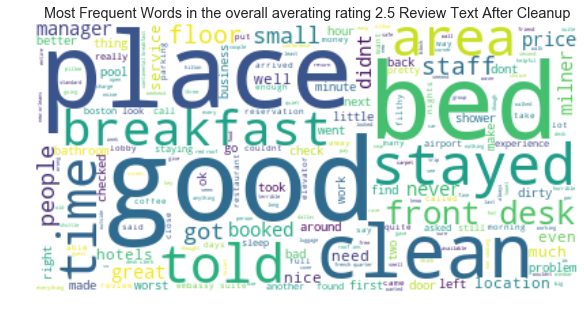

In [134]:
wordcloud_avgrat2_5_final = WordCloud( background_color="white").generate(avgrat2_5_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat2_5_final, interpolation='bilinear')
plt.title("Most Frequent Words in the overall averating rating 2.5 Review Text After Cleanup")
plt.axis("off")
plt.show()

#### For overall average grating = 3.0

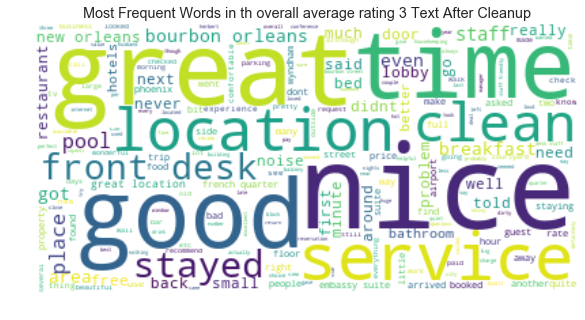

In [135]:
wordcloud_avgrat3_final = WordCloud( background_color="white").generate(avgrat3_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat3_final, interpolation='bilinear')
plt.title("Most Frequent Words in th overall average rating 3 Text After Cleanup")
plt.axis("Off")
plt.show()

In [136]:
#### For overall average grating = 3.5

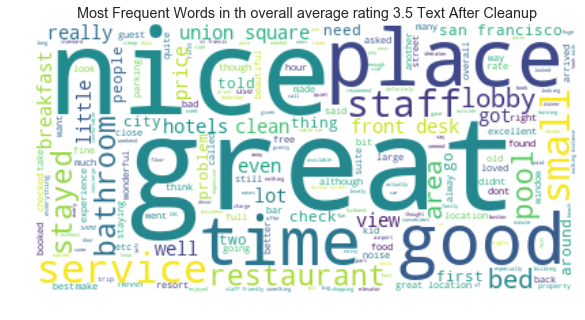

In [137]:
wordcloud_avgrat3_5_final = WordCloud( background_color="white").generate(avgrat3_5_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat3_5_final, interpolation='bilinear')
plt.title("Most Frequent Words in th overall average rating 3.5 Text After Cleanup")
plt.axis("Off")
plt.show()

# For overall average grating = 4.0

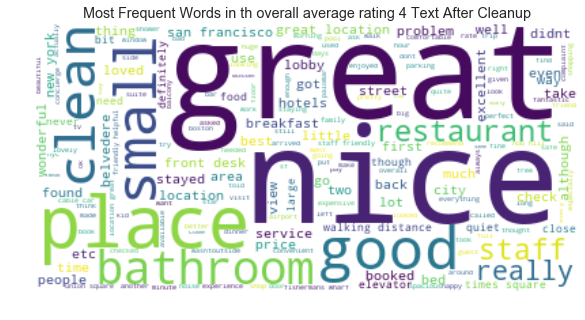

In [138]:
wordcloud_avgrat4_final = WordCloud( background_color="white").generate(avgrat4_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat4_final, interpolation='bilinear')
plt.title("Most Frequent Words in th overall average rating 4 Text After Cleanup")
plt.axis("Off")
plt.show()

In [139]:
#For overall average grating = 4.5

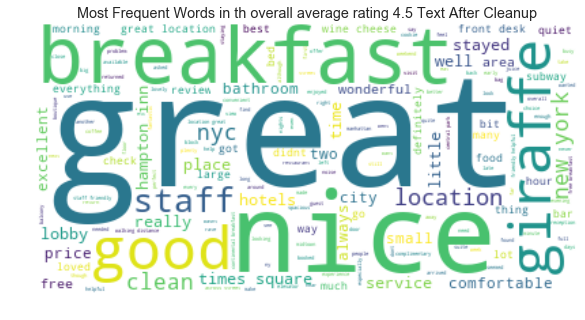

In [140]:
wordcloud_avgrat4_5_final = WordCloud( background_color="white").generate(avgrat4_5_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_avgrat4_5_final, interpolation='bilinear')
plt.title("Most Frequent Words in th overall average rating 4.5 Text After Cleanup")
plt.axis("Off")
plt.show()

In [141]:
df.head()

Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   
3  hotel_101   
4  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   
3                                                                                                         good weekend wife quite regularly visit seattle see football game shuttle airport always time operates almost 24 hours typical marriott always clean functional restaurant good good items others quite normal large convention occurs quite regularly weekends careful isstay away pool side old remodeled recently noise hallways especially around pool annoying standard complaint charge internet usage   
4                                                                                      great airport lovely indoor pool area looks like lodge staff friendly helpful clean comfortable spacious minimal noise outside could hear planes really listened breakfast buffet good value great coffee starbucks omelet chef slightest clue got scramble omelet might put three spinach leaves whole thing cooked nothing booked cars eat free package included parking 25 gas card still deal worth overall good experience   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   
3            0                     0             5             5   
4            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservic

### Understanding the New Feature Tokens 

In [142]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

582347 words total, with a vocabulary size of 24090
Max sentence length is 1825


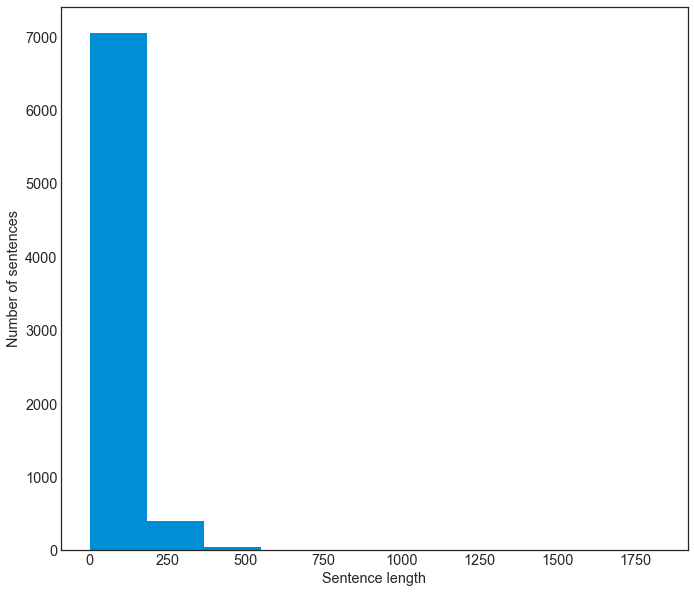

In [143]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

#### From the above bar graph we can undestand the the more of reviews are having sentence length 200 or more

### Calculate the number of words in each ReviewText

In [144]:
df['num_words'] = df.reviewtext.apply(lambda x : len(x.split()))

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
df.tail(2)

Hotelid  \
7502  hotel_200   
7503  hotel_200   

                                                               reviewtext  \
7502                                       ottimo showreview14599783 full   
7503  un relax en el ritmo trepidante de new york showreview14443615 full   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
7502            0                     0             6             5   
7503            0                     0             5             5   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
7502                5                   6               5               5   
7503                5                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
7502                       5                          4.5             370   
7503                       6                          4.5             370   

                                                                               tokens  \
7502                                               [ottimo, showreview14599783, full]   
7503  [un, relax, en, el, ritmo, trepidante, de, new, york, showreview14443615, full]   

      num_words  
7502          3  
7503         11

In [146]:
df['num_words'].describe()

count    7504.000000
mean       77.604877
std        67.253150
min         1.000000
25%        36.000000
50%        65.000000
75%       102.000000
max      1825.000000
Name: num_words, dtype: float64

### Binning the No of Words for better understanding of how the words are ditributed

In [147]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,200,300,400,500, np.inf], labels=['0-100', '100-200', '200-000','300-400','400-500' ,'>500'])

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
df.sample(3)

Hotelid  \
2166  hotel_142   
4993  hotel_171   
2163  hotel_142   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
2166  lovely harbor court mother law stayed harbor court 7 23 7 28 08 love san francisco really liked harbor court staff fantastically helpful friendly amenities quite nice things like complimentary cookies milk apples anytime lemonade free wireless internet laptops cotton balls q tips well shampoo conditioner lotion etc make difference location really convenient public transportation within blocks embarcadero station catch number trains muni transportation bart california cable cars go early morn...   
4993                                                                                                                                                                                                                                                                                                                                                    wonderful experience wonderful sofitel may 2005 staff helpful hidden charges bill expressed many others pool unusually cold looking forward staying sofitel miami   
2163  great husband stayed harbor court 8 08 8 14 2008 loved every aspect beautifully restored stylish small enough storage drawers bed closet bathroom long glass shelf plenty thingsdont overpack please spend extra money get king view nice look windows see oakland bridge would especially like thank ross dulceprinting boarding pass got group jason staff making nice come backthe offers free coffee tea morning apples freshly made iced tea afternoona wonderful hosted wine happy hour 5 6pm everyday coo...   

      NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
2166            3                     3             5             5   
4993            8                     4             6             6   
2163            1                     1             6             6   

      Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
2166                5                   6               6               6   
4993                1                   6               1               6   
2163                6                   6               6               6   

      Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
2166                       4                          4.0             269   
4993                       1                          4.0             226   
2163                       6                          4.0             269   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   tokens  \
2166  [lovely, harbor, court, mother, law, stayed, harbor, court, 7, 23, 7, 28, 08, love, san, francisco, really, liked, harbor, court, staff, fantastically, helpful, friendly, amenities, quite, nice, things, like, complimentary, cookies, milk, apples, anytime, lemonade, free, wireless, internet, laptops, cotton, balls, q, tips, well, shampoo, conditioner, lotion, etc, make, difference, location, really, convenient, public, transportation, within, blocks, embarcadero, station, 

In [149]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [150]:
word_distribution.head(10)

bins  counts
0    0-100    5590
1  100-200    1575
2  200-000     261
3  300-400      48
4  400-500      18
5     >500      12

#### From the above word distribution we can understand that more than 70% reviews are having word count less than 100

### Let us visualize the words ditribution per bin

Text(0.5,1,'Word distribution per bin')

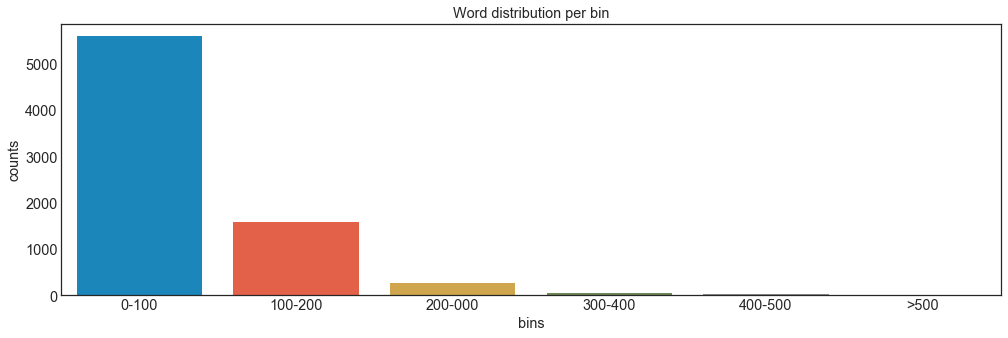

In [151]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

### Histogram of text length of each each Sentiment

In [152]:
def length(text):    
    return len(text)

In [153]:
df['length'] = df['reviewtext'].apply(len)
df.head(3)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Hotelid  \
0  hotel_101   
1  hotel_101   
2  hotel_101   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   
2            0                     0             2             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   
1                       2                          3.5             245   
2                       1                          3.5             245   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                tokens  \
0                                                                                                               [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4, 30am, waiting, ride, lobby, staff, around, anyone, could, walked, place, bad, place, nothing, stands, average, either]   
1                                   

In [154]:
df['length'].describe()

count     7504.000000
mean       523.542377
std        448.639754
min          4.000000
25%        250.000000
50%        439.000000
75%        684.250000
max      12002.000000
Name: length, dtype: float64

#### Extracting the data of each class

In [155]:
ovr_avgrat2 = df[df['AverageOverallRatingOfHotel'] == 2.0]
ovr_avgrat2_5 = df[df['AverageOverallRatingOfHotel'] == 2.5]
ovr_avgrat3 = df[df['AverageOverallRatingOfHotel'] == 3]
ovr_avgrat3_5 = df[df['AverageOverallRatingOfHotel'] == 3.5]
ovr_avgrat4 = df[df['AverageOverallRatingOfHotel'] == 4.0]
ovr_avgrat4_5 = df[df['AverageOverallRatingOfHotel'] == 4.5]

### Histogram of text lenght of each Sentiment

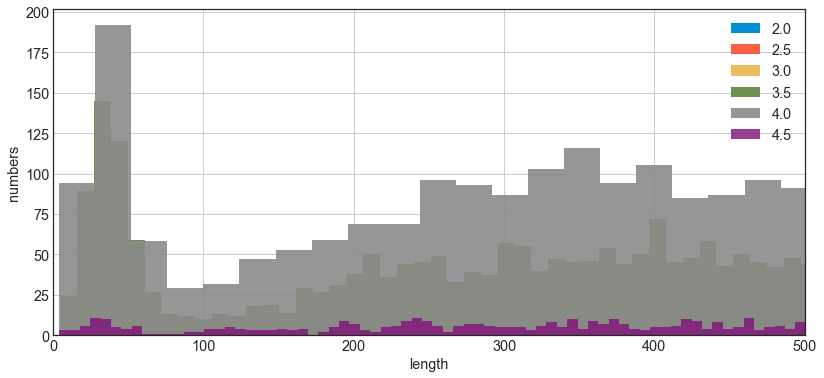

In [156]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(ovr_avgrat2['length'], alpha = 1.0, bins=bins, label='2.0')
plt.hist(ovr_avgrat2_5['length'], alpha = 0.9, bins=bins, label='2.5')
plt.hist(ovr_avgrat3['length'],alpha = 0.8 , bins=bins, label='3.0')
plt.hist(ovr_avgrat3_5['length'], alpha = 1.0, bins=bins, label='3.5')
plt.hist(ovr_avgrat4['length'], alpha = 0.9, bins=bins, label='4.0')
plt.hist(ovr_avgrat4_5['length'],alpha = 0.8 , bins=bins, label='4.5')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [157]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       7057
location    4684
would       4535
good        4446
staff       4296
nice        4084
stayed      3467
clean       3046
get         2636
service     2629
dtype: int64

### No of Words

In [158]:
df['word_count'] = df['reviewtext'].apply(lambda x: len(str(x).split(" ")))
df[['reviewtext','word_count']].head(3)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   

   word_count  
0          49  
1          32  
2         192

### No Of Characters

In [159]:
df['char_count'] = df['reviewtext'].str.len() ## this also includes spac
df[['reviewtext','char_count']].head(1)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


reviewtext  \
0  average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   

   char_count  
0         340

### Average Word Length

### Let us look at the Sentiment Analysis of Review Text Using Sentiment Intensity Analyzer

In [160]:
# Pre-Processing
import nltk
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
df["reviewtext"]= df["reviewtext"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Rating']=''
df.loc[df['Polarity Score']>0,'Rating']='Positive'
df.loc[df['Polarity Score']==0,'Rating']='Neutral'
df.loc[df['Polarity Score']<0,'Rating']='Negative'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [161]:
df.head(1)

Hotelid  \
0  hotel_101   

                                                                                                                                                                                                                                                                                                                                             reviewtext  \
0  average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   

                                                                                                                                                                                                                                                                                                                                                                                                   tokens  \
0  [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4, 30am, waiting, ride, lobby, staff, around, anyone, could, walked, place, bad, place, nothing, stands, average, either]   

   num_words   bins  length  word_count  char_count  Polarity Score  \
0         49  0-100     340          49         340         -0.8274   

   Neutral Score  Negative Score  Positive Score    Rating  
0          0.715            0.22           0.064  Negative

In [162]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

### Understadning the Rating Vs Sentiment Analysis

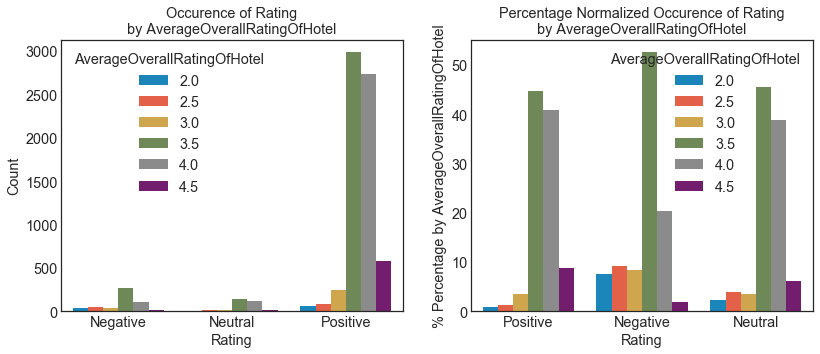

In [163]:
huevar = "AverageOverallRatingOfHotel"
xvar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

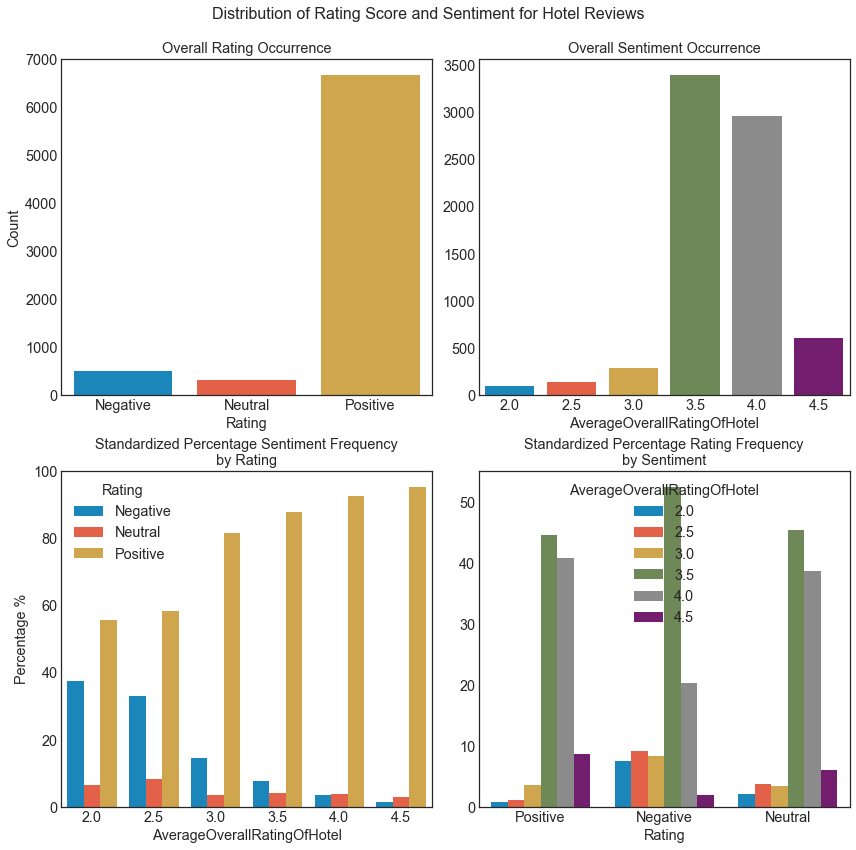

In [164]:
f, axes = plt.subplots(2,2, figsize=[12,12])
sns.countplot(x="Rating", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Rating")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Rating Occurrence")

sns.countplot(x="AverageOverallRatingOfHotel", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("AverageOverallRatingOfHotel")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Sentiment Occurrence")

percentstandardize_barplot(x="AverageOverallRatingOfHotel",y="Percentage",hue="Rating",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("AverageOverallRatingOfHotel")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Sentiment Frequency\nby Rating")

percentstandardize_barplot(x="Rating",y="Percentage",hue="AverageOverallRatingOfHotel",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Rating Frequency\nby Sentiment")
axes[1,1].set_xlabel("Rating")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Rating Score and Sentiment for Hotel Reviews", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

### Tokenizing the Text

In [165]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens_after"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head(2)

Hotelid  \
0  hotel_101   
1  hotel_101   

                                                                                                                                                                                                                                                                                                                                             reviewtext  \
0  average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                               go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   
1                       2                          3.5             245   

                                                                                                                                                                                                                                                                                                                                                                                                   tokens  \
0  [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4, 30am, waiting, ride, lobby, staff, around, anyone, could, walked, place, bad, place, nothing, stands, average, either]   
1                                                                                                                                                [go, elsewhere, place, hugely, overpriced, mis, managed, better, places, hilton, radisson, airport, area, arrived, walk, endless, corridors, finding, key, work, finally, got, another, peoples, hairs, bathtub, gross, small, old, school, pricey, yuk]   

   num_words   bins  length  word_count  char_count  Polarity Score  \
0         49  0-100     340          49         340         -0.8274   
1         32  0-100     215          32         215         -0.0516   

   Neutral Score  Negative Score  Positive Score    Rating  \
0          0.715           0.220           0.064  Negative   
1          0.833           0.086           0.081  Negative   

                                                                                                                                                                                                                                                                                                                                                                                             tokens_after  
0  [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4,

### Stemming the Text

In [166]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['stemmedtext']= df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [167]:
df[['reviewtext','stemmedtext']].head(3)

reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           stemmedtext  
0                                                                                                                                                                                                                averag averag noth stand weather good would recommend eat 13 coin restaur short walk marriott versu eat restaur 7 eleven block away need thing typic marriott charg everyth includ internet bother leav 4 30am wait ride lobbi staff around anyon could walk place bad place noth stand averag either  
1                                                                                                                                                                                                                                                                                                                      go elsewher place huge overpr mi manag better place hilton radisson airport area arriv walk endless corridor find key work final got anoth peopl hair bathtub gross small old school pricey yuk  
2  wont go back stay 11 14 08 2 night book packag marriott web site packag incud delux free park ga card check told readi could give handicap ask look first floor face street park lot went back said would wait came back 2 hour later gave key 199 3 away origin look face street park lot went back front desk said book delux suppos overlook pool higher floor told delux standard get nowher front desk went back 1st floor call phone number marriott reward card explain problem told would manag call cal...

### Lemmatizing

In [168]:
from textblob import Word
df['lemmatizedtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df[['reviewtext','lemmatizedtext']].head(3)

C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1107: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\lexnames'>
  for i, line in enumerate(self.open('lexnames')):
C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adj'>
  for i, line in enumerate(self.open('index.%s' % suffix)):
C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adv'>
  for i, line in enumerate(self.open('index.%s' % suffix)):
C:\Users\prash\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\prash\\AppData\\Roaming\\nltk_data\\corpora\

reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        lemmatizedtext  
0                                                                                                                                                                     average average nothing standing weather good would recommend eating 13 coin restaurant short walk marriott versus eating restaurant 7 eleven block away need thing typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stand average either  
1                                                                                                                                                                                                                                                                                                   go elsewhere place hugely overpriced mi managed better place hilton radisson airport area arrived walk endless corridor finding key work finally got another people hair bathtub gross small old school pricey yuk  
2  wont go back stayed 11 14 08 2 night booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hour later gave key 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott rew...

In [169]:
df[['reviewtext','stemmedtext','lemmatizedtext']].head(3)

reviewtext  \
0                                                                                                                                                                 average average nothing standing weather good would recommend eating 13 coins restaurant short walk marriott versus eating restaurant 7 eleven block away needs things typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stands average either   
1                                                                                                                                                                                                                                                                                              go elsewhere place hugely overpriced mis managed better places hilton radisson airport area arrived walk endless corridors finding key work finally got another peoples hairs bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 nights booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hours later gave keys 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           stemmedtext  \
0                                                                                                                                                                                                                averag averag noth stand weather good would recommend eat 13 coin restaur short walk marriott versu eat restaur 7 eleven block away need thing typic marriott charg everyth includ internet bother leav 4 30am wait ride lobbi staff around anyon could walk place bad place noth stand averag either   
1                                                                                                                                                                                                                                                                                                                      go elsewher place huge overpr mi manag better place hilton radisson airport area arriv walk endless corridor find key work final got anoth peopl hair bathtub gross small old school pricey yuk   
2  wont go back stay 11 14 08 2 night book packag marriott web site packag incud delux free park ga card check told readi could give handicap ask look first floor face street park lot went back said would wait came back 2 hour later gave key 199 3 away origin look face street park lot went back front desk said book delux suppos overlook pool higher floor told delux standard get nowher front desk went back 1st floor call phone number marriott reward card explain problem told would manag call cal...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [170]:
#! pip install TextBlob


In [171]:
from textblob import Word
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df[['reviewtext','lemmatizedtext']].head(3)

reviewtext  \
0                                                                                                                                                                     average average nothing standing weather good would recommend eating 13 coin restaurant short walk marriott versus eating restaurant 7 eleven block away need thing typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stand average either   
1                                                                                                                                                                                                                                                                                                   go elsewhere place hugely overpriced mi managed better place hilton radisson airport area arrived walk endless corridor finding key work finally got another people hair bathtub gross small old school pricey yuk   
2  wont go back stayed 11 14 08 2 night booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hour later gave key 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott rew...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        lemmatizedtext  
0                                                                                                                                                                     average average nothing standing weather good would recommend eating 13 coin restaurant short walk marriott versus eating restaurant 7 eleven block away need thing typical marriott charge everything including internet bothered leave 4 30am waiting ride lobby staff around anyone could walked place bad place nothing stand average either  
1                                                                                                                                                                                                                                                                                                   go elsewhere place hugely overpriced mi managed better place hilton radisson airport area arrived walk endless corridor finding key work finally got another people hair bathtub gross small old school pricey yuk  
2  wont go back stayed 11 14 08 2 night booked package marriotts web site package incuded deluxe free parking gas card checked told ready could give handicapped asked look first floor facing street parking lot went back said would wait came back 2 hour later gave key 199 3 away originally looked facing street parking lot went back front desk said booked deluxe supposed overlook pool higher floor told deluxe standard getting nowhere front desk went back 1st floor called phone number marriott rew...

In [172]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviewtext']= df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### Saving Preprocessed Text to Disk

In [173]:
df.to_csv("Hotels_PreProcessed_stemmed.csv")

In [174]:
df.head(1)

Hotelid  \
0  hotel_101   

                                                                                                                                                                                                                                                                                              reviewtext  \
0  averag averag noth stand weather good would recommend eat 13 coin restaur short walk marriott versu eat restaur 7 eleven block away need thing typic marriott charg everyth includ internet bother leav 4 30am wait ride lobbi staff around anyon could walk place bad place noth stand averag either   

   NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   

                                                                                                                                                                                                                                                                                                                                                                                                   tokens  \
0  [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4, 30am, waiting, ride, lobby, staff, around, anyone, could, walked, place, bad, place, nothing, stands, average, either]   

   num_words   bins  length  word_count  char_count  Polarity Score  \
0         49  0-100     340          49         340         -0.8274   

   Neutral Score  Negative Score  Positive Score    Rating  \
0          0.715            0.22           0.064  Negative   

                                                                                                                                                                                                                                                                                                                                                                                             tokens_after  \
0  [average, average, nothing, standing, weather, good, would, recommend, eating, 13, coins, restaurant, short, walk, marriott, versus, eating, restaurant, 7, eleven, block, away, needs, things, typical, marriott, charge, everything, including, internet, bothered, leave, 4, 30am, waiting, ride, lobby, staff, around, anyone, could, walked, place, bad, place, nothing, stands, average, either]   

                                                                                                                                                                                                                                                                                             stemmedtext  \
0  averag averag noth stand weather good would recommend eat 13 coin restaur short walk marriott versu eat restaur 7 eleven block away need thing typic marriott charg everyth includ internet bother leav 4 30am wait ride lobbi staff around anyon could walk place bad place noth stand averag either   

                                                                                                                                                                                                                                                                                                                                     lemmatizedtext  
0  average average nothing standing weather good would recommend eating 13 coin restaurant short walk marriott versus eating restaurant

In [175]:
bk = df

In [179]:
df.dtypes

Hotelid                          object
reviewtext                       object
NoOfReaders                       int64
HelpfulToNoOfreaders              int64
Value_rating                      int64
Rooms_rating                      int64
Location_rating                   int64
Cleanliness_rating                int64
Checkin_rating                    int64
Service_rating                    int64
Businessservice_rating            int64
AverageOverallRatingOfHotel     float64
AveragePricing                    int64
tokens                           object
num_words                         int64
bins                           category
length                            int64
word_count                        int64
char_count                        int64
Polarity Score                  float64
Neutral Score                   float64
Negative Score                  float64
Positive Score                  float64
Rating                           object
tokens_after                     object


In [180]:
df1 = df.drop(['reviewtext','tokens','bins','length','word_count', 'char_count', 'tokens_after','stemmedtext','lemmatizedtext','Rating'],axis=1)

In [181]:
 df1.dtypes

Hotelid                         object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                   int64
num_words                        int64
Polarity Score                 float64
Neutral Score                  float64
Negative Score                 float64
Positive Score                 float64
dtype: object

In [182]:
ratings_vr = df1.groupby(['Hotelid'])[['Value_rating']].mean().rename(columns = {'Value_rating':'Mean_value_rating'}).reset_index()

In [183]:
ratings_nr =  df1.groupby(['Hotelid'])[['NoOfReaders']].mean().rename(columns = {'NoOfReaders':'Mean_No_readers'}).reset_index()


In [184]:
ratings_hnr =  df1.groupby(['Hotelid'])[['HelpfulToNoOfreaders']].mean().rename(columns = {'HelpfulToNoOfreaders':'Mean_H_No_readers'}).reset_index()


In [185]:
ratings_rr =  df1.groupby(['Hotelid'])[['Rooms_rating']].mean().rename(columns = {'Rooms_rating':'Mean_rooms_rating'}).reset_index()

In [186]:
ratings_lr =  df1.groupby(['Hotelid'])[['Location_rating']].mean().rename(columns = {'Location_rating':'Mean_location_rating'}).reset_index()

In [187]:
ratings_cr =  df1.groupby(['Hotelid'])[['Cleanliness_rating']].mean().rename(columns = {'Cleanliness_rating':'Mean_cleanliess_rating'}).reset_index()

In [188]:
ratings_chr =  df1.groupby(['Hotelid'])[['Checkin_rating']].mean().rename(columns = {'Checkin_rating':'Mean_checkin_rating'}).reset_index()

In [189]:
ratings_sr =  df1.groupby(['Hotelid'])[['Service_rating']].mean().rename(columns = {'Service_rating':'Mean_service_rating'}).reset_index()

In [190]:
ratings_bsr =  df1.groupby(['Hotelid'])[['Businessservice_rating']].mean().rename(columns = {'Businessservice_rating':'Mean_bus_service_rating'}).reset_index()

In [191]:
ratings_avgor =  df1.groupby(['Hotelid'])[['AverageOverallRatingOfHotel']].mean().rename(columns = {'AverageOverallRatingOfHotel':'Mean_avg_overall_rating'}).reset_index()

In [192]:
ratings_avgpr =  df1.groupby(['Hotelid'])[['AveragePricing']].mean().rename(columns = {'AveragePricing':'Mean_avg_pricing'}).reset_index()

In [194]:
ratings_nw = df1.groupby(['Hotelid'])[['num_words']].mean().rename(columns = {'num_words':'Mean_no_words'}).reset_index()

In [195]:
ratings_ps = df1.groupby(['Hotelid'])[['Polarity Score']].mean().rename(columns = {'Polarity Score':'Mean_pol_score'}).reset_index()

In [197]:
ratings_nus = df1.groupby(['Hotelid'])[['Neutral Score']].mean().rename(columns = {'Neutral Score':'Mean_neu_score'}).reset_index()

In [198]:
ratings_neg = df1.groupby(['Hotelid'])[['Negative Score']].mean().rename(columns = {'Negative Score':'Mean_neg_score'}).reset_index()

In [199]:
ratings_pos = df1.groupby(['Hotelid'])[['Positive Score']].mean().rename(columns = {'Positive Score':'Mean_pos_score'}).reset_index()

In [1502]:
df1 = df1.convert_objects(convert_numeric=True)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [200]:
df_list = [ratings_vr, ratings_rr, ratings_lr, ratings_cr, ratings_chr, ratings_sr, ratings_bsr, ratings_avgor,ratings_avgpr,ratings_nw,ratings_ps,ratings_nus,ratings_neg,ratings_pos]


In [201]:
df = df_list[0]
for df_ in df_list[1:]:
    df = df.merge(df_, on='Hotelid')

In [202]:
df.shape

(75, 15)

In [203]:
df.head(4)

Hotelid  Mean_value_rating  Mean_rooms_rating  Mean_location_rating  \
0  hotel_101           3.700000           4.075000              3.625000   
1  hotel_102           4.453488           4.116279              3.883721   
2  hotel_103           4.321429           4.303571              3.642857   
3  hotel_106           4.203125           4.312500              4.140625   

   Mean_cleanliess_rating  Mean_checkin_rating  Mean_service_rating  \
0                4.350000             3.875000             3.750000   
1                4.511628             4.011628             4.593023   
2                4.232143             3.321429             4.285714   
3                4.593750             4.156250             4.296875   

   Mean_bus_service_rating  Mean_avg_overall_rating  Mean_avg_pricing  \
0                 2.850000                      3.5               245   
1                 2.093023                      4.0               192   
2                 2.446429                      4.0               231   
3                 3.093750                      4.0               173   

   Mean_no_words  Mean_pol_score  Mean_neu_score  Mean_neg_score  \
0      62.750000        0.706657        0.601450        0.077000   
1      88.244186        0.881974        0.620151        0.038581   
2      82.375000        0.763955        0.615857        0.052911   
3      59.734375        0.853180        0.568078        0.058859   

   Mean_pos_score  
0        0.321450  
1        0.341233  
2        0.331357  
3        0.373062

In [204]:
avg_ratings = df

In [205]:
avg_ratings = avg_ratings.drop(['Hotelid'], axis=1)

In [206]:
# Eliminating null values
for i in avg_ratings.columns:
    avg_ratings[i] = avg_ratings[i].fillna(int(avg_ratings[i].mean()))
for i in avg_ratings.columns:
    print(avg_ratings[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [207]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object with a range of 0-1

# Create the scaler object with a range of 0-1
scaler = StandardScaler()

# Fit on the training data
scaler.fit(avg_ratings)

# Transform both the training and testing data
avg_ratings1 = scaler.transform(avg_ratings)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


C:\Users\prash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


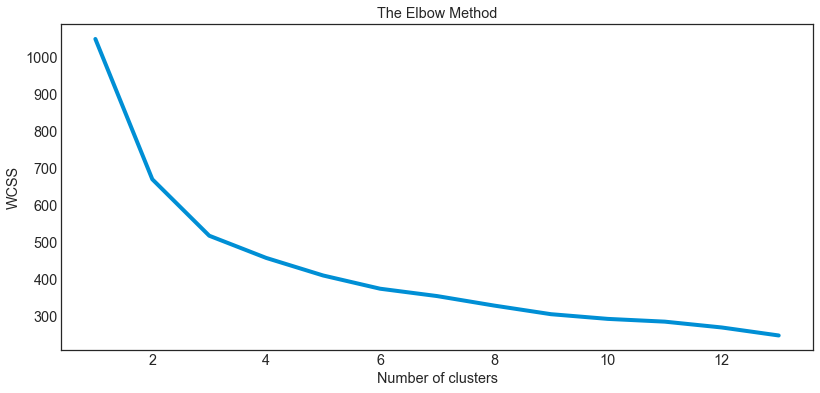

In [208]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(avg_ratings1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [209]:
avg_ratings2 = pd.DataFrame(avg_ratings1)
# Applying k-means to the hotels dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(avg_ratings2)

avg_ratings2 = avg_ratings2.as_matrix(columns=None)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [212]:
df.head(2)

Hotelid  Mean_value_rating  Mean_rooms_rating  Mean_location_rating  \
0  hotel_101           3.700000           4.075000              3.625000   
1  hotel_102           4.453488           4.116279              3.883721   

   Mean_cleanliess_rating  Mean_checkin_rating  Mean_service_rating  \
0                4.350000             3.875000             3.750000   
1                4.511628             4.011628             4.593023   

   Mean_bus_service_rating  Mean_avg_overall_rating  Mean_avg_pricing  \
0                 2.850000                      3.5               245   
1                 2.093023                      4.0               192   

   Mean_no_words  Mean_pol_score  Mean_neu_score  Mean_neg_score  \
0      62.750000        0.706657        0.601450        0.077000   
1      88.244186        0.881974        0.620151        0.038581   

   Mean_pos_score  
0        0.321450  
1        0.341233

In [216]:
hid = df['Hotelid']
result = pd.DataFrame({'Hotelid':hid, 'cluster_id' : y_kmeans})

In [217]:
result.head(20)

Hotelid  cluster_id
0   hotel_101           0
1   hotel_102           0
2   hotel_103           0
3   hotel_106           0
4   hotel_107           0
5   hotel_108           1
6   hotel_109           1
7   hotel_110           1
8   hotel_111           1
9   hotel_112           1
10  hotel_113           0
11  hotel_116           1
12  hotel_117           1
13  hotel_118           1
14  hotel_121           0
15  hotel_122           0
16  hotel_123           0
17  hotel_124           1
18  hotel_127           1
19  hotel_128           0

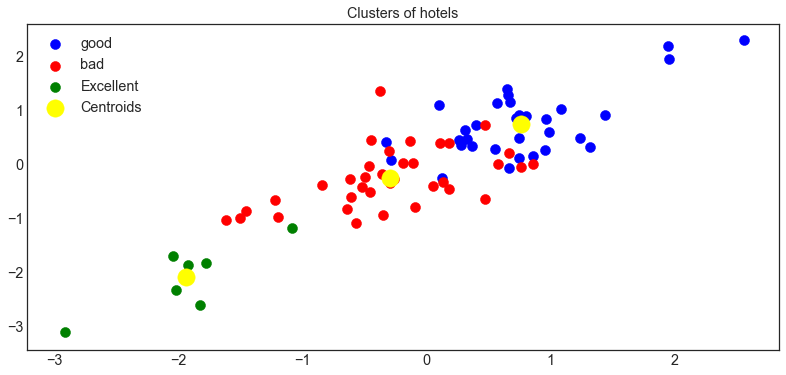

In [218]:
# Visualising the clusters
plt.scatter(avg_ratings2[y_kmeans == 0, 0], avg_ratings2[y_kmeans == 0,1],s=100,c='blue',label= 'good')
plt.scatter(avg_ratings2[y_kmeans == 1, 0], avg_ratings2[y_kmeans == 1,1],s=100,c='red',label='bad')
plt.scatter(avg_ratings2[y_kmeans == 2, 0], avg_ratings2[y_kmeans == 2,1],s=100,c='green',label='Excellent')
#plt.scatter(avg_ratings2[y_kmeans == 3, 0], avg_ratings2[y_kmeans == 3,1],s=100,c='orange',label='very good')
#plt.scatter(avg_ratings2[y_kmeans == 3, 0], avg_ratings2[y_kmeans == 3,1],s=100,c='pink',label='very very good')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of hotels')
plt.legend()
plt.show()

In [1521]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [1522]:
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for NoOfReaders as dependent variable: 0.6651686712911518
R2 score for HelpfulToNoOfreaders as dependent variable: 0.5813670515928215
R2 score for Value_rating as dependent variable: 0.6069583684057547
R2 score for Rooms_rating as dependent variable: 0.7306418621071851
R2 score for Location_rating as dependent variable: 0.7939616448119075
R2 score for Cleanliness_rating as dependent variable: 0.7527122818096909
R2 score for Checkin_rating as dependent variable: 0.7944686593111111
R2 score for Service_rating as dependent variable: 0.5000910224266704
R2 score for Businessservice_rating as dependent variable: -0.3267915296943742
R2 score for AverageOverallRatingOfHotel as dependent variable: 0.7589974588945374
R2 score for AveragePricing as dependent variable: -0.5956143349850127
R2 score for num_words as dependent variable: 0.9998215166852763
R2 score for length as dependent variable: 0.9996398854936906
R2 score for word_count as dependent variable: 0.9998599829168977
R2 score f

Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?
Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.

I used a loop and predicted every single feature as a dependent variable with the results shown above.
As you can see, "Businessservice_rating" and "AveragePricing"  as dependent variables have negative R2 scores.
Their negative scores imply that they are necessary for identifying Hotels review pattern because the remaining features cannot explain the variation in them.
Similarly, "Service_Rating", "Value_rating", "NoOfReaders" and  "HelpfulToNoOfReaders" have very low R2 scores.
Their low scores also imply that they are necessary for identifying Hotel reviews patterns.
It may be not as necessary, compared to the other features, for identifying hotel's review.
We will explore this further.

# Visualize Feature Distributions¶


Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of thefeatures present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific hotel, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific hotel, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


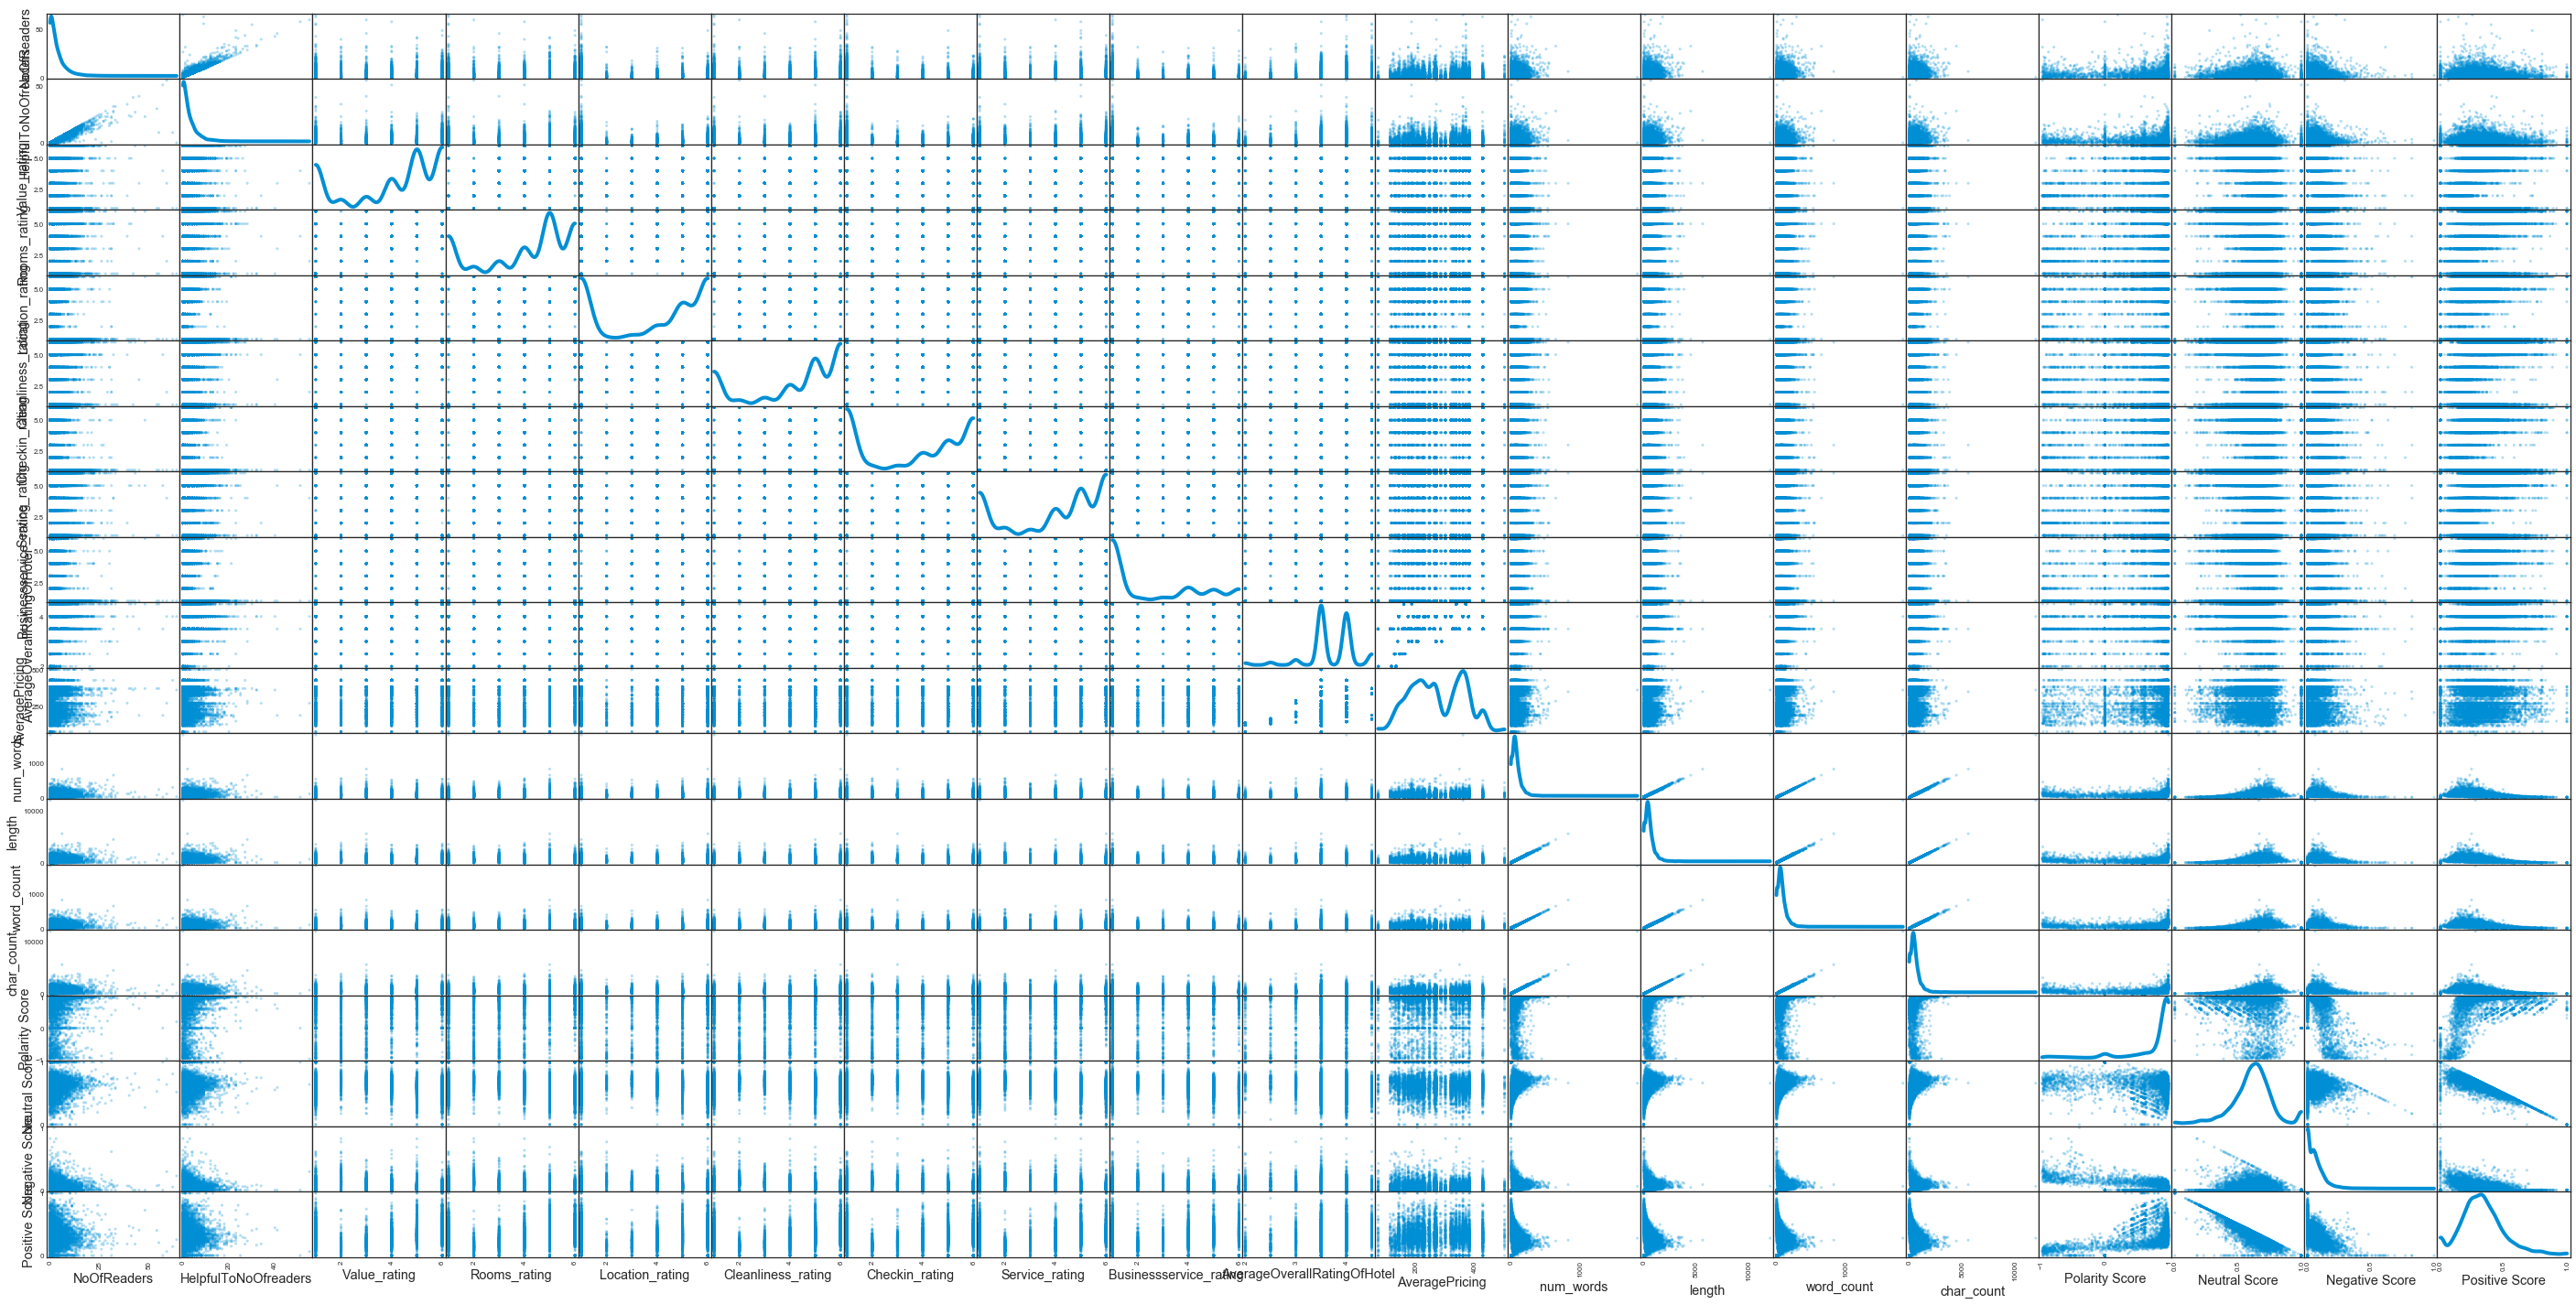

In [1523]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (44,25), diagonal = 'kde');

# Correlation Matrix

This is to cross-reference with the scatter matrix above to draw more accurate insights from the data.
The higher the color is on the bar, the higher the correlation.

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


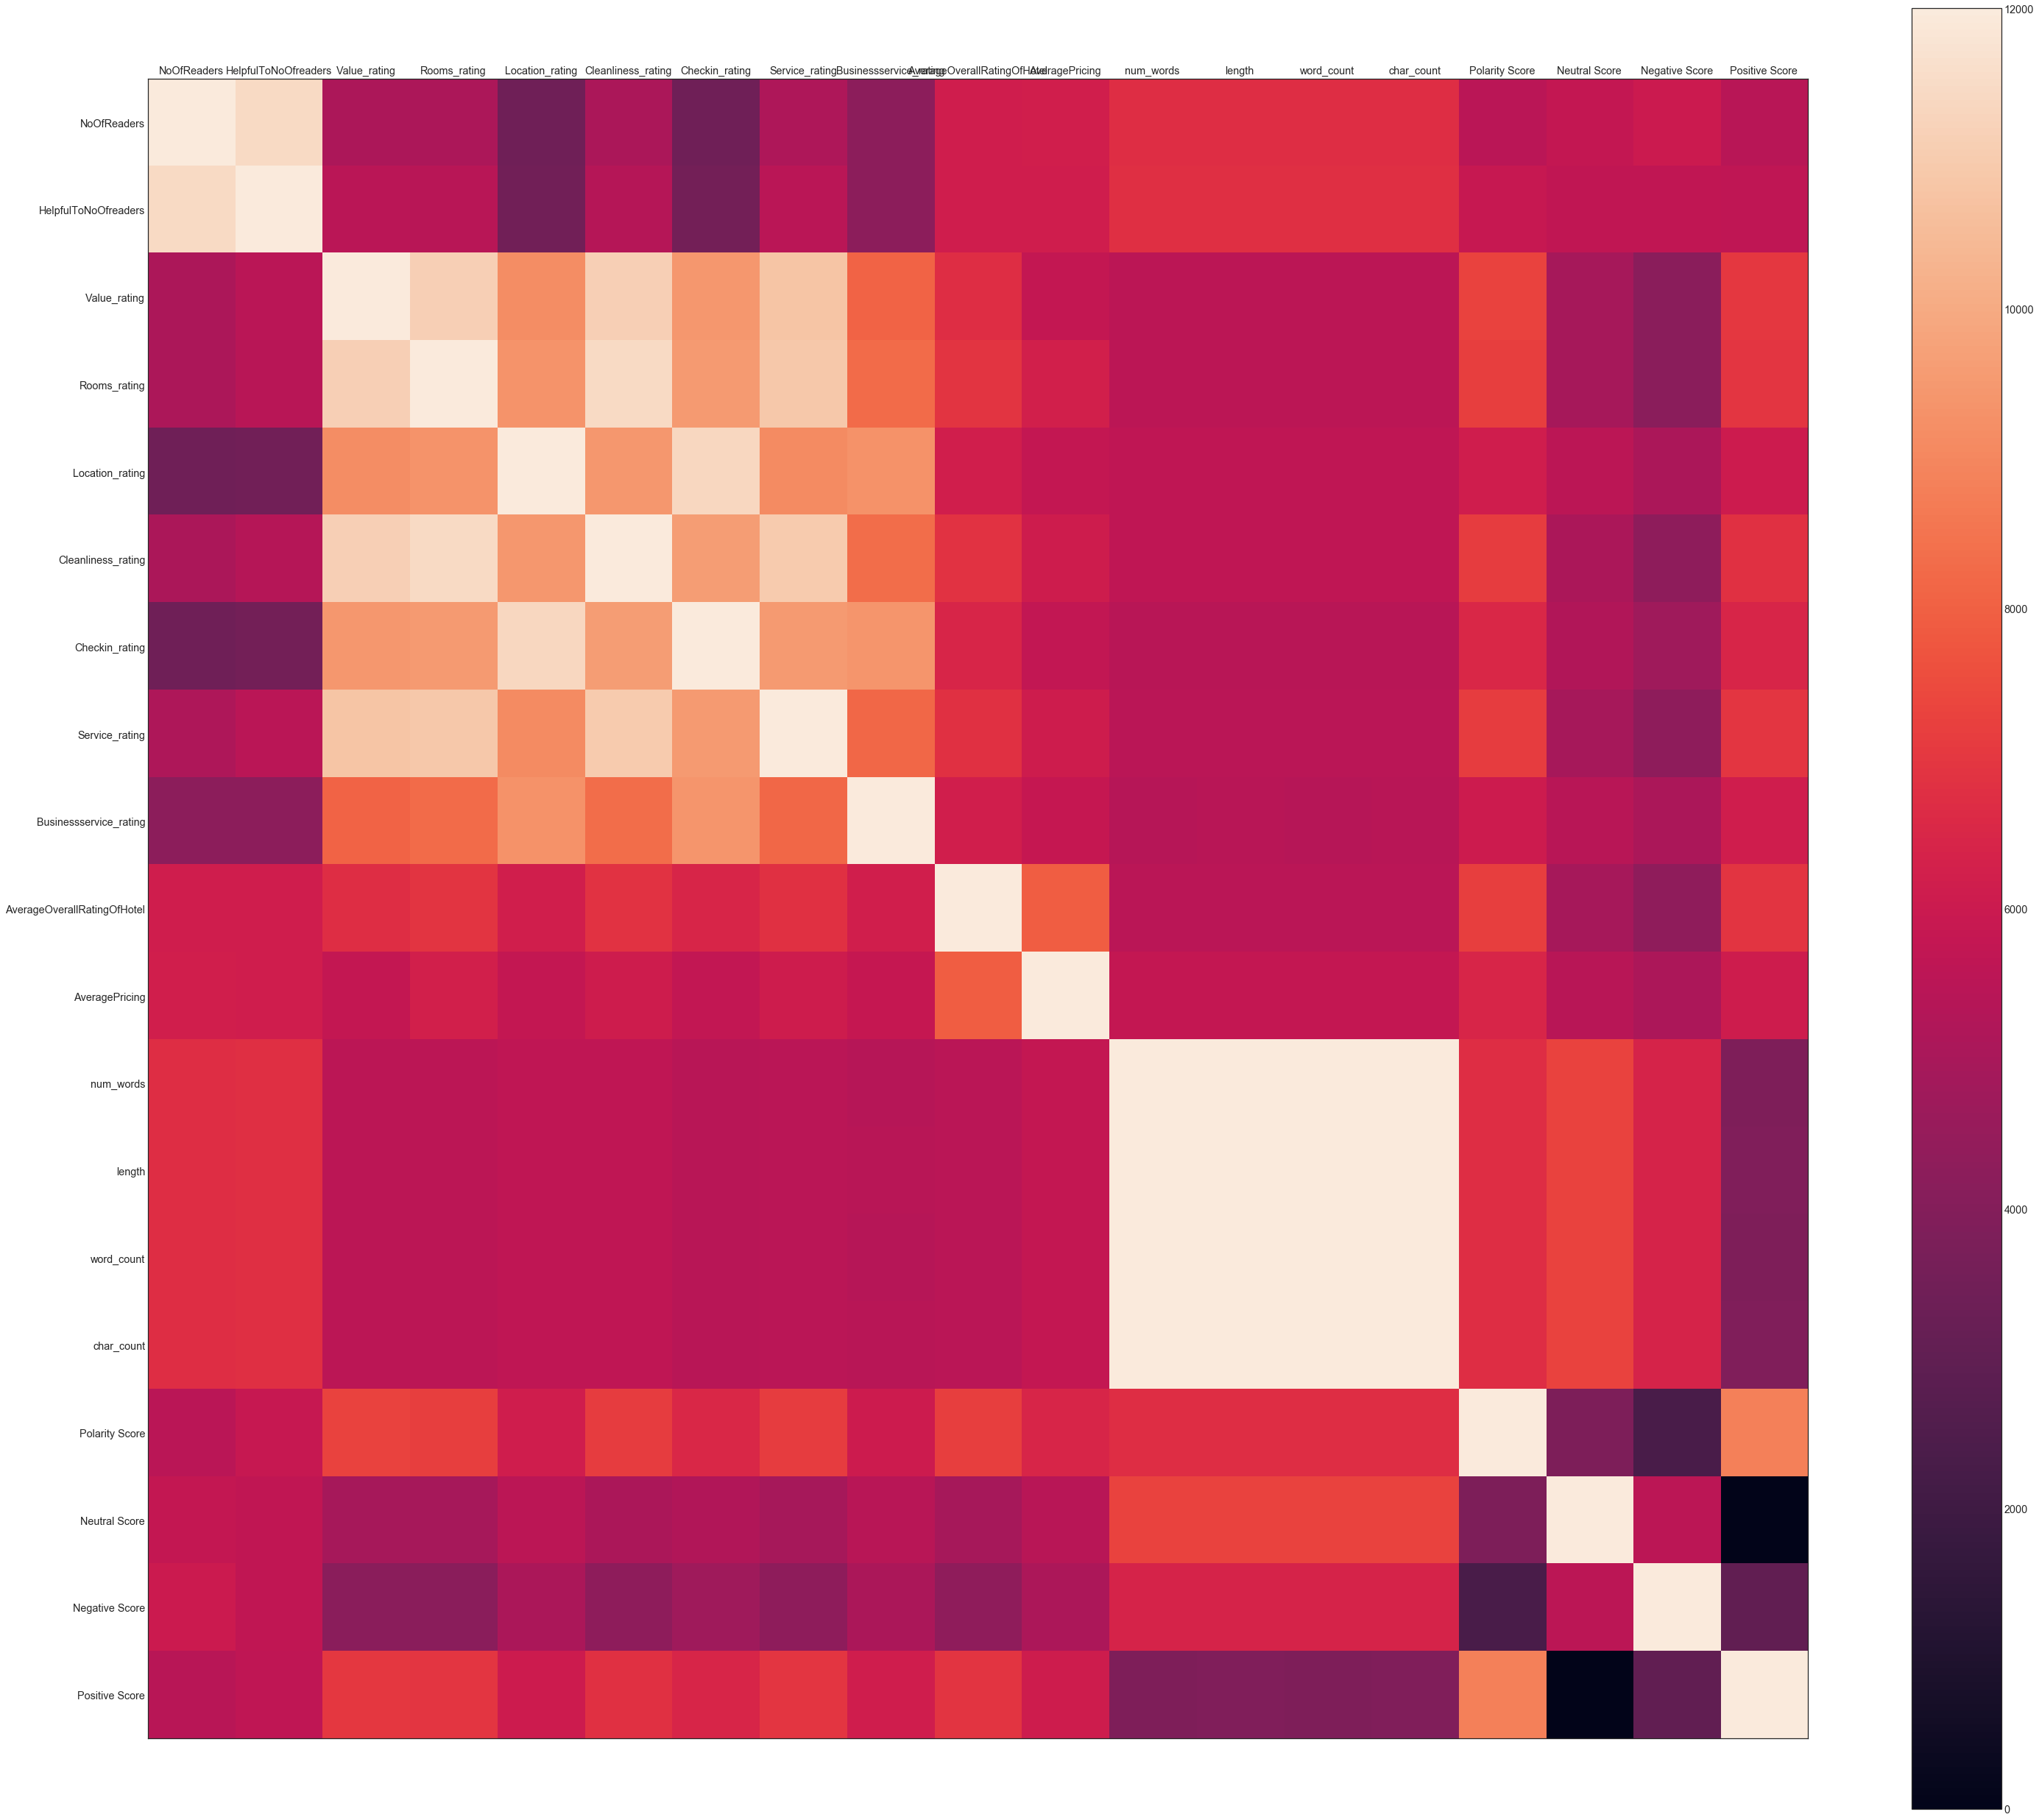

In [1524]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=45):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

In [1525]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

C:\Users\prash\Anaconda3\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


I have plotted a correlation matrix to compare with the scatter matrix to ensure this answer is as accurate as possible.

The follow pairs of features seem to have some correlation as observed from the scatter plot showing a linear trend and the correlation plot showing a high correlation between the two features. I have ranked them in order of correlation from strongest to weakest.
num_of_words and length
num_of_words and word_count
num_of words and char_count
length and word_count
legnth and char_count
word_count and char_count
No of Readers and HelpfultoNoofReaders
cleanlineess_ratng and room_rating
checkin_rating and location_rating
priority_score and Rating
These features that are strongly correlated does lend credence to our  claim that legnth,word_count,char_count may not be necessary for identifying customers' spending habits.
length,word_count,char_count has a high correlation with num_words that corresponds to a relatively high R2 score when we regress Grocery on all other features.
The data are not normally distributed due to the presence of many outliers.
Evidently, most are skewed to the left where most of the data points lie.
This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

# Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

# Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

Assign a copy of the data to log_data after applying a logarithm scaling. Use the np.log function for this.
Assign a copy of the sample data to log_samples after applying a logrithm scaling. Again, use np.log.

In [1526]:
data.isnull().sum()

NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
num_words                      0
length                         0
word_count                     0
char_count                     0
Polarity Score                 0
Neutral Score                  0
Negative Score                 0
Positive Score                 0
dtype: int64

# data1 = data.drop(['length','word_count','char_count'], axis = 1)

In [1527]:
 from sklearn.preprocessing import OneHotEncoder
 enc = OneHotEncoder(handle_unknown='ignore')
 enc.fit(df2)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [1528]:
data1.head(2)

NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0            0                     0             4             4   
1            0                     0             2             4   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   
1                       2                          3.5             245   

   num_words  Polarity Score  Neutral Score  Negative Score  Positive Score  
0         49         -0.8274          0.715           0.220           0.064  
1         32         -0.0516          0.833           0.086           0.081

In [1529]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object with a range of 0-1

# Create the scaler object with a range of 0-1
scaler = StandardScaler()

# Fit on the training data
scaler.fit(data1)

# Transform both the training and testing data
data2 = scaler.transform(data1)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [1532]:
data1.shape


(7504, 16)

ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

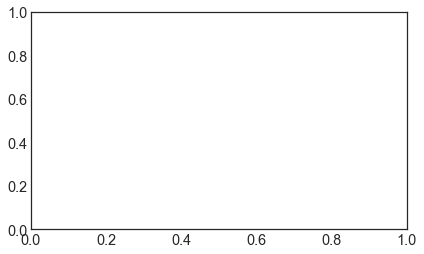

In [1531]:
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data2 = pd.DataFrame(data2)
# Applying k-means to the hotels dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(df1)

data2 = data2.as_matrix(columns=None)

In [ ]:
# Visualising the clusters
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0,1],s=100,c='red',label='bad')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1,1],s=100,c='blue',label='good')
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2,1],s=100,c='green',label='Excellent')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of hotels')
plt.legend()
plt.show()